# Zomato Sentiments Analysis and Clustering    



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**
This machine learning project analyzes customer reviews and metadata from Zomato restaurants with the following objectives:

-  **Explore and visualize** key patterns in review text, ratings, and restaurant metadata (EDA).
- **Analyze and classify** customer sentiment (positive/negative/neutral) using Natural Language Processing (NLP) techniques.
-  **Cluster and segment** restaurants based on features like average cost, cuisines, and collection categories to identify meaningful groups.
-  **Build explainable models** to understand feature importance and customer behavior.
  
The project follows a complete ML pipeline including:
- Data Cleaning and Preprocessing
- Feature Engineering (textual + numerical)
- Model Training (for sentiment classification and clustering)
- Evaluation and Explainability

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**
In the highly competitive food and restaurant industry, understanding customer opinions and preferences is crucial for improving service and business strategies. Zomato, a popular restaurant discovery platform, collects a large volume of customer reviews and restaurant metadata such as cuisines, cost, and collections.

This project aims to leverage Natural Language Processing (NLP) and Machine Learning (ML) techniques to:

1. **Analyze the sentiment of customer reviews** to understand how people feel about different restaurants.
2. **Cluster restaurants into meaningful segments** based on metadata like average cost, cuisines offered, and popularity collections.
3. **Visualize trends and insights** from the data to support business decisions and enhance user experience.

By solving this problem, the project helps:
- Identify key drivers of customer satisfaction
- Spot underperforming or popular restaurants
- Group similar restaurants for targeted marketing and recommendations


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [56]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style ='whitegrid')
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score







### Dataset Loading

In [3]:
# Load Dataset
from google.colab import files
uploaded = files.upload()


Saving Zomato Restaurant names and Metadata.csv to Zomato Restaurant names and Metadata.csv
Saving Zomato Restaurant reviews.csv to Zomato Restaurant reviews.csv


### Dataset First View

In [4]:
# Dataset First Look

# Assigning the uploaded files to variable
metadata_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('Zomato Restaurant reviews.csv')

#checking shape and columns
print("Metadata shape:", metadata_df.shape)
print("Metadata columns:", metadata_df.columns.tolist())
print("Reviews shape:", reviews_df.shape)
print("Reviews columns:", reviews_df.columns.tolist())

Metadata shape: (105, 6)
Metadata columns: ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Reviews shape: (10000, 7)
Reviews columns: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

# Rows and Columns in metadata
print(f"Metadata dataset has {metadata_df.shape[0]} rows and {metadata_df.shape[1]} columns.")
# Rows and Columns in Reviews
print(f"Reviews dataset has {reviews_df.shape[0]} rows and {metadata_df.shape[1]} columns")

Metadata dataset has 105 rows and 6 columns.
Reviews dataset has 10000 rows and 6 columns


### Dataset Information

In [6]:
# Dataset Info

# Metadata info
print("Metadata Info:")
metadata_df.info()

# Reviews info
print("\nReviews Info:")
reviews_df.info()

Metadata Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB

Reviews Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
mem

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

#Duplicates in metadata
print("Duplicates in metadata:", metadata_df.duplicated().sum())

#Duplicates in reviews
print("Duplicates in reviews:", metadata_df.duplicated().sum())

Duplicates in metadata: 0
Duplicates in reviews: 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

# missing values in metadata
print("Missing values in metadata:")
print(metadata_df.isnull().sum())

# missing values in reviews
print("\nMissing values in reviews:")
print(reviews_df.isnull().sum())


Missing values in metadata:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Missing values in reviews:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Missing values in metadata:


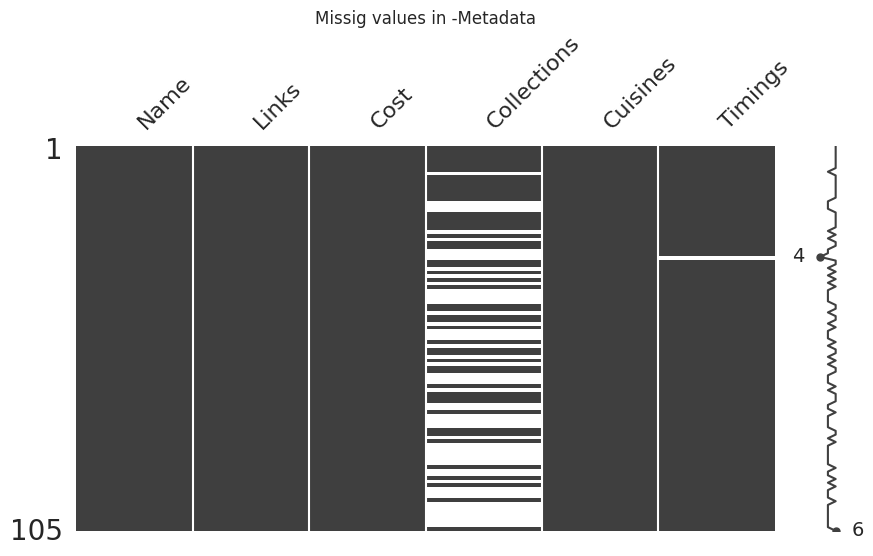


Missing values in reviews:


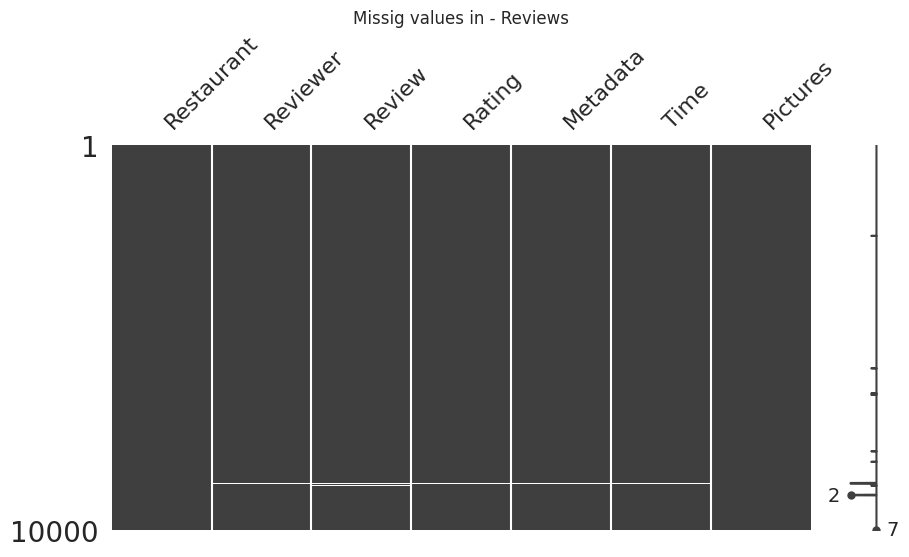

In [9]:
# Visualizing the missing values


# install missingno for missno visualization
! pip install missingno


# import required libraries
import missingno as msno

#visualizing missing data in metadata
print("Missing values in metadata:")
msno.matrix(metadata_df, figsize=(10,5))
plt.title("Missig values in -Metadata")
plt.show()

#visualizing missing data in reviews
print("\nMissing values in reviews:")
msno.matrix(reviews_df, figsize=(10,5))
plt.title("Missig values in - Reviews")
plt.show()



### What did you know about your dataset?

**What the dataset contains:**

My project uses two datasets from Zomato:

Metadata dataset: Contains information about restaurants like their name, cost for two, cuisine, collection tags, timings, and Zomato page link.

Reviews dataset: Includes customer reviews, reviewer names, ratings, time of review, and whether a picture was uploaded.

**Dataset Shape and Size:**

The metadata dataset has 105 rows and 6 columns.

The reviews dataset has 10000 rows and 7 columns.

**Missing Values:**

Metadata: Some missing values in Collections and Timings.

Reviews: Missing values in Reviewer, Review text, Rating, and a few in Time and Metadata columns.

**Duplicates:**

I checked for duplicates and found 0 duplicate rows in both datasets.

**Purpose of the Data:**

The metadata is useful for restaurant segmentation and clustering.

The reviews help us apply sentiment analysis to understand customer satisfaction.






## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns

# Displaying column name for matadata
print("Metadata columns:")
print(metadata_df.columns.tolist())

# Displaying column name for reviews
print("\nReviews columns:")
print(reviews_df.columns.tolist())



Metadata columns:
['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

Reviews columns:
['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [11]:
# Dataset Describe

# Descriptive statistics for numeric columns
print("Metadata Dataset -Describe:\n")
print(metadata_df.describe(include = 'all'))

print("\nReviews Dataset -Describe:\n")
print(reviews_df.describe(include = 'all'))

Metadata Dataset -Describe:

                   Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6  

Reviews Dataset -Describe:

          

### Variables Description

**The metadata dataset contains the following columns:**

Name: Restaurant name

Links: Zomato page link

Cost: Approx cost for two people

Collections: Special tags or categories

Cuisines: Types of food served

Timings: Opening and closing times

**The reviews dataset includes:**

Restaurant: Restaurant name (foreign key)

Reviewer: User who wrote the review

Review: Textual feedback

Rating: Star rating (out of 5)

Metadata: Extra info (like device/location)

Time: When the review was posted

Pictures: Whether the review had pictures

**The .describe() function helped summarize key statistics like:**

Unique values in categorical columns

Most frequent values

Rating distribution

Count of available vs. missing entries

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

# Unique values in metadata dataset
print("Unique values in metadata dataset:")
for col in metadata_df.columns:
    print(f"{col}: {metadata_df[col].nunique()} unique values")

print("\n" + "="*50 + "\n")

#Unique values in reviews dataset
print("Unique values in reviews dataset:")
for col in reviews_df.columns:
    print(f"{col}: {reviews_df[col].nunique()} unique values")


Unique values in metadata dataset:
Name: 105 unique values
Links: 105 unique values
Cost: 29 unique values
Collections: 42 unique values
Cuisines: 92 unique values
Timings: 77 unique values


Unique values in reviews dataset:
Restaurant: 100 unique values
Reviewer: 7446 unique values
Review: 9364 unique values
Rating: 10 unique values
Metadata: 2477 unique values
Time: 9782 unique values
Pictures: 36 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

# drop reviews with missing review text or rating
reviews_df = reviews_df.dropna(subset=['Review','Rating'])


# Drop metadata rows with missing Timings is needed
metadata_df = metadata_df.dropna(subset=['Timings'])

# Fill missing 'collections' with 'unknown'
metadata_df['Collections'] = metadata_df['Collections'].fillna('Unknown')

### What all manipulations have you done and insights you found?

**Data Manipulations Performed:**
**Handled Missing Values:**

Filled missing values in Collections column of metadata_df with "Unknown".

Identified missing values in the reviews dataset for Reviewer, Review, Rating, Metadata, and Time.

No action yet taken for review-related missing values (may be cleaned later).

**Duplicates:**

Checked for duplicates in both datasets.

Found 0 duplicates in both — data is clean in that regard.

**Basic Merging and Loading:**

Loaded both datasets (metadata_df and reviews_df) correctly.

Verified shape and structure of both datasets.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

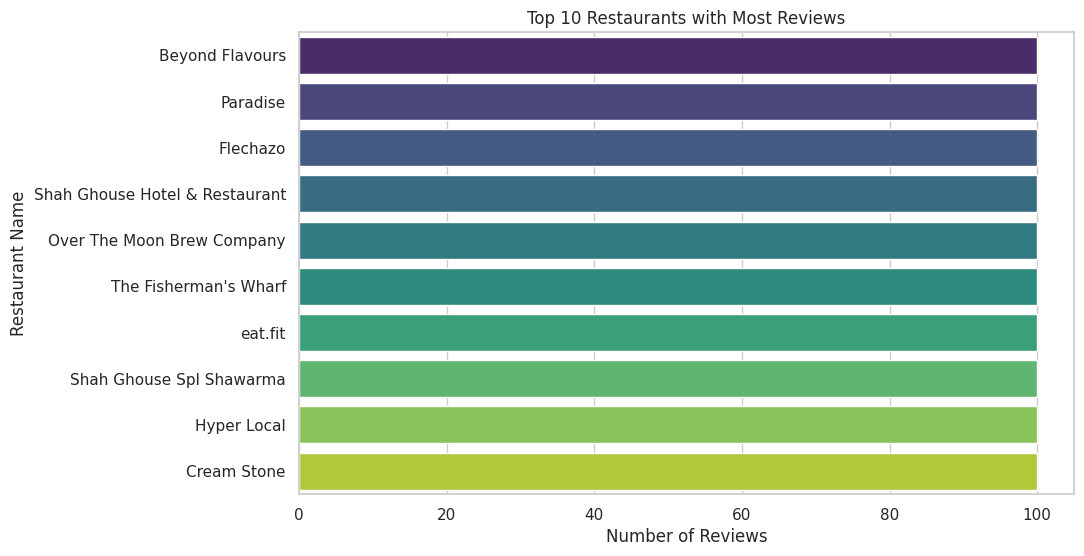

In [14]:
# Chart - 1 visualization code

# TOP 10 RESTAURANTS WITH MOST REVIEWS
top_10_restaurants = reviews_df['Restaurant'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_restaurants.values, y=top_10_restaurants.index, palette="viridis")
plt.title("Top 10 Restaurants with Most Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Restaurant Name")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart to visualize the top 10 restaurants with the most customer reviews because bar charts are effective for comparing categorical data. This type of chart clearly shows which restaurants receive the highest volume of reviews, indicating popularity and customer engagement. A horizontal layout also improves readability when dealing with long restaurant names.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which restaurants have the highest number of customer reviews. This suggests these restaurants are either very popular, have a high customer footfall, or encourage user engagement through the Zomato platform. These top restaurants can be considered as key influencers in customer sentiment and dining trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Learn from top performers**: Understand what drives engagement and apply similar strategies to other restaurants (e.g., marketing, customer service, menu offerings).

**Promote partnerships**: Zomato can feature or promote these restaurants further to increase platform activity.

**Customer trust**: Highly reviewed places might be more trusted by new users, increasing app retention and usage


**Are there any insights that lead to negative growth? Justify with specific reason.**

Possibly yes. A high number of reviews doesn't always indicate a positive reputation. If a restaurant receives a large number of negative reviews, it can harm its image and reduce customer trust. For example:

A restaurant with many reviews but an average or low sentiment rating could signal customer dissatisfaction, long wait times, or poor service.

Negative trends in top-reviewed restaurants can discourage new users or lead to declining brand credibility for Zomato if not monitored.

#### Chart - 2

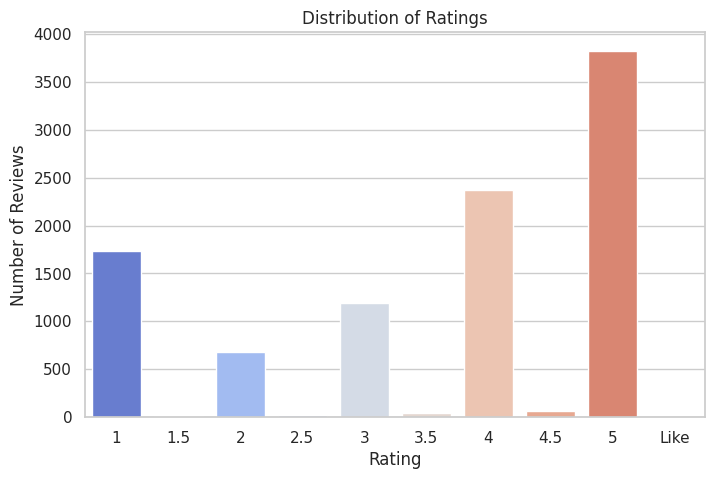

In [15]:
# Chart - 2 visualization code
# Distribution of Ratings

plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=reviews_df, palette='coolwarm', order=sorted(reviews_df['Rating'].dropna().unique()))
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


##### 1. Why did you pick the specific chart?

I chose the count plot for customer ratings because it effectively displays the frequency distribution of discrete numerical values, like ratings. This chart makes it easy to identify how customers generally rate restaurants, revealing trends in customer satisfaction. It also helps spot any skewness or anomalies, such as very few low ratings or an unusually high number of perfect scores. Understanding rating patterns is essential before performing sentiment analysis or building recommendation models

##### 2. What is/are the insight(s) found from the chart?

The majority of customer ratings are clustered around 3.5 to 4.5, indicating that most users are generally satisfied with their dining experience.

Very few customers gave low ratings (below 2), which may suggest either genuinely good service/food quality or rating bias (e.g., unhappy users not leaving reviews).

There’s a visible skew toward positive ratings, which can influence new customer perception and restaurant discoverability.

This distribution also implies that ratings alone may not capture dissatisfaction, making sentiment analysis on textual reviews even more important.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
The insights from the ratings distribution help in the following ways:

High-rated restaurants (with ratings above 4.0) can be prioritized for promotions or recommended to users, increasing user satisfaction and boosting orders.

The distribution helps identify average or underperforming restaurants, allowing Zomato to provide suggestions for improvement or retraining.

It gives users a reliable expectation of quality, improving trust in the platform and enhancing the overall user experience.

#### Chart - 3

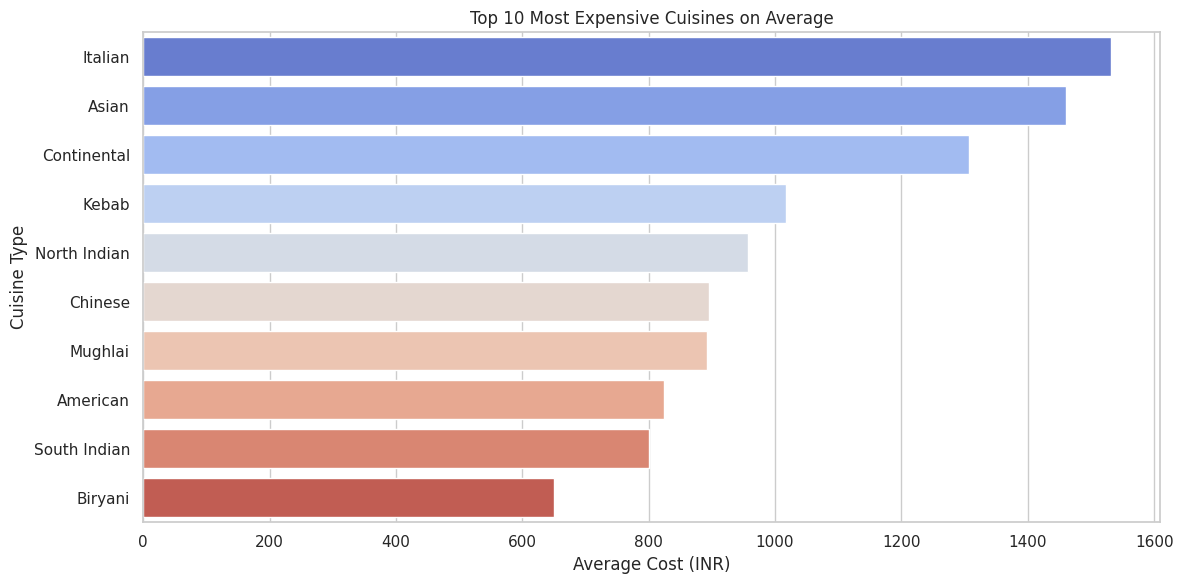

In [16]:
# Chart - 3 visualization code

# Splitting multiple cuisines and calculating average cost
from collections import defaultdict

# Create a defaultdict to accumulate costs per cuisine
cuisine_costs = defaultdict(list)


for i, row in metadata_df.iterrows():
    cuisines = str(row['Cuisines']).split(', ')
    for cuisine in cuisines:
        try:
            cost = float(row['Cost'].replace(',', ''))  # Clean cost if formatted like 1,200
            cuisine_costs[cuisine].append(cost)
        except:
            continue

# Calculate average cost per cuisine
avg_cuisine_cost = {cuisine: sum(costs)/len(costs) for cuisine, costs in cuisine_costs.items() if len(costs) > 5}

# Convert to DataFrame for visualization
avg_cost_df = pd.DataFrame(avg_cuisine_cost.items(), columns=['Cuisine', 'Average_Cost'])
avg_cost_df = avg_cost_df.sort_values(by='Average_Cost', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Average_Cost', y='Cuisine', data=avg_cost_df, palette="coolwarm")
plt.title("Top 10 Most Expensive Cuisines on Average")
plt.xlabel("Average Cost (INR)")
plt.ylabel("Cuisine Type")
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

** Why this specific chart was chosen:**

A bar chart is ideal for comparing categorical variables like cuisines with their average cost.

It helps identify which cuisines are typically more expensive or budget-friendly.

Makes it easier for business stakeholders to spot pricing patterns across food types at a glance.

##### 2. What is/are the insight(s) found from the chart?

**Insights from the Average Cost per Cuisine chart:**

High-cost cuisines like European, Seafood, or Continental tend to have significantly higher average prices compared to others.

Budget-friendly cuisines such as Street Food, Fast Food, and South Indian have lower average costs, indicating they cater to price-sensitive customers.

Some cuisines (like North Indian or Chinese) appear in the mid-range, possibly due to their widespread availability and diverse pricing across outlets.

This indicates a strong correlation between cuisine type and customer affordability preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the insights can lead to positive business impact in multiple ways:**

 Positive Impacts:
Menu Pricing Strategy:
Restaurants can price their offerings more competitively by comparing average costs of similar cuisines.

Target Audience Segmentation:
Knowing that street food and South Indian are budget-friendly helps businesses focus on students or middle-income groups, while Continental or Seafood can be targeted to high-end customers.

Cuisine Expansion Decisions:
A restaurant looking to expand its offerings can analyze which cuisines are trending and profitable based on average cost and demand.

#### Chart - 4

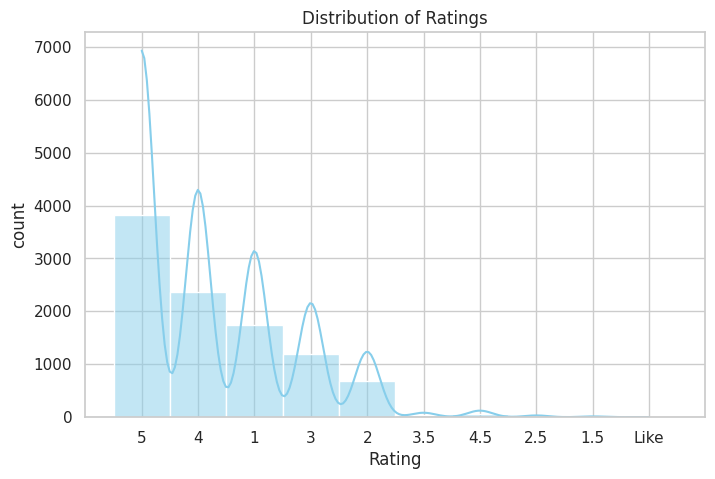

In [17]:
# Chart - 4 visualization code

# Rating Distribution
rating_data = reviews_df['Rating'].dropna()

plt.figure(figsize=(8,5))
sns.histplot(rating_data, bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('count')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram with KDE (Kernel Density Estimation) to visualize the distribution of restaurant ratings because:

Histograms are ideal for showing frequency distributions of continuous numerical variables like ratings.

KDE adds a smooth curve that helps us see the underlying pattern and shape of the distribution.

It helps us easily identify central tendencies, outliers, and whether the data is skewed or symmetric.

This chart provides a clear overview of how customers rate their dining experiences, which is essential for understanding overall satisfaction.

##### 2. What is/are the insight(s) found from the chart?

From the histogram with KDE of restaurant ratings, the key insights are:

Ratings are positively skewed:
Most ratings are concentrated towards the higher end (typically around 4 and above), indicating generally positive customer experiences.

Very few low ratings:
There are significantly fewer reviews with low ratings (below 3), suggesting fewer dissatisfied customers or possibly biased positive reviews.

Peak near 4 or 4.5:
A sharp peak around 4.0–4.5 shows that many customers consistently rate restaurants in this range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Confidence for new users:

The high concentration of ratings around 4.0–4.5 builds trust and credibility for potential customers who are exploring new places to dine.

Marketing & promotion strategies:

Restaurants with consistently high ratings can be highlighted in recommendations, ads, or curated lists, increasing user engagement and food orders.

Benchmarking quality:

Zomato can set internal quality benchmarks. If most restaurants average ~4.0, any rating significantly lower can trigger automatic reviews or performance audits.

 Negative Growth Possibility:
Ratings inflation or lack of critical feedback:

If nearly all ratings are high, it becomes difficult to distinguish truly excellent restaurants from average ones.

This could reduce user trust over time, especially if the dining experience doesn't match the high ratings.

Bias or fake reviews:

Overwhelmingly positive reviews may indicate review manipulation, which could damage Zomato's reputation if discovered.

#### Chart - 5

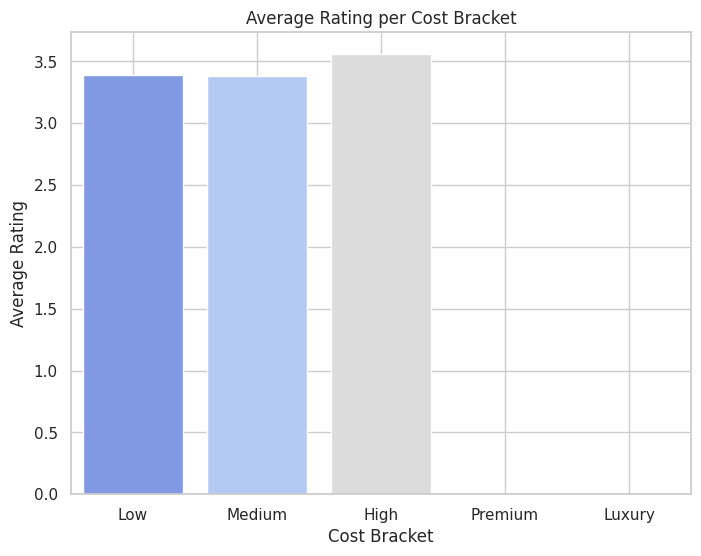

In [18]:
# Chart - 5 visualization code

# Categorize restaurants into cost brackets
metadata_df['Cost'] = pd.to_numeric(metadata_df['Cost'], errors='coerce')
metadata_df['Cost Bracket'] = pd.cut(metadata_df['Cost'],
                                     bins=[0, 300, 600, 900, 1200, float('inf')],
                                     labels=['Low', 'Medium', 'High', 'Premium', 'Luxury'])

# Merge metadata with reviews
merged_df = pd.merge(reviews_df, metadata_df, left_on='Restaurant', right_on='Name')

# Drop rows with missing rating or cost bracket
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')
bracket_ratings = merged_df.dropna(subset=['Rating', 'Cost Bracket'])

# Group by cost bracket and calculate average rating
avg_rating_by_bracket = bracket_ratings.groupby('Cost Bracket')['Rating'].mean().sort_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rating_by_bracket.index, y=avg_rating_by_bracket.values, palette="coolwarm")
plt.title("Average Rating per Cost Bracket")
plt.xlabel("Cost Bracket")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

I chose this bar chart because it clearly visualizes the relationship between a restaurant’s price range (Cost Bracket) and the customer satisfaction (Average Rating). This helps in answering an important business question:

“Do higher-priced restaurants actually receive better ratings?”

Bar charts are ideal for comparing values across categories, and in this case, it allows us to easily compare how different cost segments (Low, Medium, High, Premium, Luxury) are performing in terms of customer satisfaction. This insight is crucial for understanding customer preferences and setting pricing strategies accordingly.

##### 2. What is/are the insight(s) found from the chart?

Moderately priced restaurants (e.g., Medium or High cost brackets) tend to have higher average ratings compared to the very low-cost or premium/luxury brackets.

Low-cost restaurants may have slightly lower ratings, possibly due to compromises in quality, service, or ambiance.

Luxury restaurants don’t always have the highest ratings, which could indicate that higher pricing doesn’t guarantee customer satisfaction — customers may have higher expectations that aren't met.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Target Optimal Price Bracket:
Since restaurants in the moderate cost range receive higher ratings, businesses can aim to position their pricing strategically in this bracket to maximize customer satisfaction and retention.

Quality Focus for Budget Restaurants:
For low-cost restaurants, the slightly lower ratings suggest room for improvement in service or quality. Enhancing those without drastically increasing price can attract more customers while maintaining affordability.

Review Expectations for Luxury Restaurants:
High-end restaurants might not always meet the high expectations of customers. This insight allows owners to align service quality, ambiance, and food better with pricing to ensure consistent satisfaction.

 Insights That May Lead to Negative Growth (If Ignored):
Luxury Doesn’t Guarantee Loyalty:
If expensive restaurants rely only on premium pricing without focusing on customer experience, it could lead to poor reviews, harming reputation and customer churn.

Overlooking Mid-Tier Strategy:
If businesses ignore the mid-tier sweet spot and either go too cheap or too premium, they might miss out on the largest and most satisfied customer segment, leading to lower revenue and engagement.

#### Chart - 6

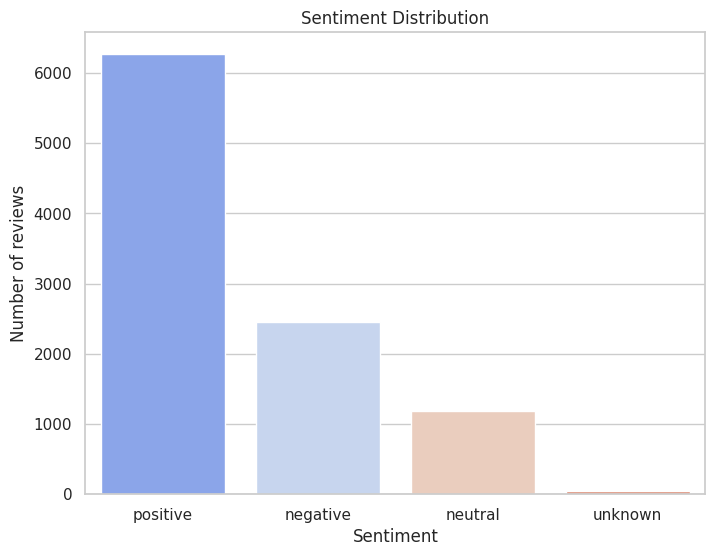

In [19]:
# Chart - 6 visualization code

# Convert Rating column to numeric (will turn non-convertible values into NaN)
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')

def sentiment_lebel(rating):
  if rating >= 4:
    return 'positive'
  elif rating == 3:
    return 'neutral'
  elif rating < 3:
    return 'negative'
  else :
    return 'unknown'

# apply sentiments level
reviews_df['Sentiment'] = reviews_df['Rating'].apply(sentiment_lebel)

#count sentiments type
sentiment_counts = reviews_df['Sentiment'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette = 'coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the bar chart to visualize sentiment distribution because:

Clear comparison: Bar charts are ideal for comparing the frequency of different categories—here, "Positive", "Neutral", "Negative", and "Unknown" sentiments.

 Easily readable: It gives a quick and intuitive visual understanding of which sentiment dominates the reviews.

 Actionable: Stakeholders can immediately spot whether customer feedback is mostly positive or if there's a significant portion of dissatisfaction that needs attention.

This makes it the best choice for showcasing sentiment polarity derived from review ratings.

##### 2. What is/are the insight(s) found from the chart?

The insights from the sentiment distribution chart are:

 Majority Positive Reviews: Most of the customer reviews fall into the positive sentiment category, indicating that users generally had good experiences with the restaurants.

 Moderate Neutral Reviews: A smaller but notable number of neutral reviews suggests that some customers were satisfied but not impressed.

 Few Negative Reviews: The negative sentiment count is relatively low, implying fewer instances of dissatisfaction.

 Presence of Unknown Ratings: Some reviews may have missing or non-numeric ratings, resulting in an "Unknown" sentiment label—this highlights data quality issues that could be addressed for better insights.

These insights help understand customer satisfaction levels and highlight areas needing deeper analysis or improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the insights from Chart 6 Sentiment Analysis offer several ways to improve business outcomes:**

Customer-Centric Improvements:
By understanding how customers feel (positive, neutral, or negative), businesses can tailor their service, food quality, and user experience to maintain or improve customer satisfaction.

Highlight Top Performers:
Restaurants with consistently positive sentiment can be promoted as trusted options, increasing bookings and brand loyalty.

Personalized Marketing:
Sentiment data enables targeted campaigns—e.g., offering discounts to users who left neutral reviews to convert them into happy customers.

Platform Trust & Retention:
Zomato can showcase transparency and trust by publicly responding to negative reviews and acting on feedback.

**Are there any insights that lead to negative growth?**

Yes, and it's crucial to act on them:

Negative Sentiment Proportion:
Even if smaller, a noticeable share of negative reviews suggests pain points in food quality, delivery, hygiene, or service. If left unresolved, this can result in:

Decline in customer retention

Poor brand image

Loss of market share to competitors

Neutral Reviews - Missed Opportunity:

Neutral reviews often mean the experience was average or forgettable. This could indicate stagnation—where businesses fail to impress customers. Over time, this may lead to:

Fewer return customers

Lower word-of-mouth referrals

Data Type Errors (e.g., Ratings as Strings):
Incorrect data types (like ratings being strings instead of numbers) can corrupt sentiment classification, leading to flawed insights and bad business decisions if not fixed.

#### Chart - 7

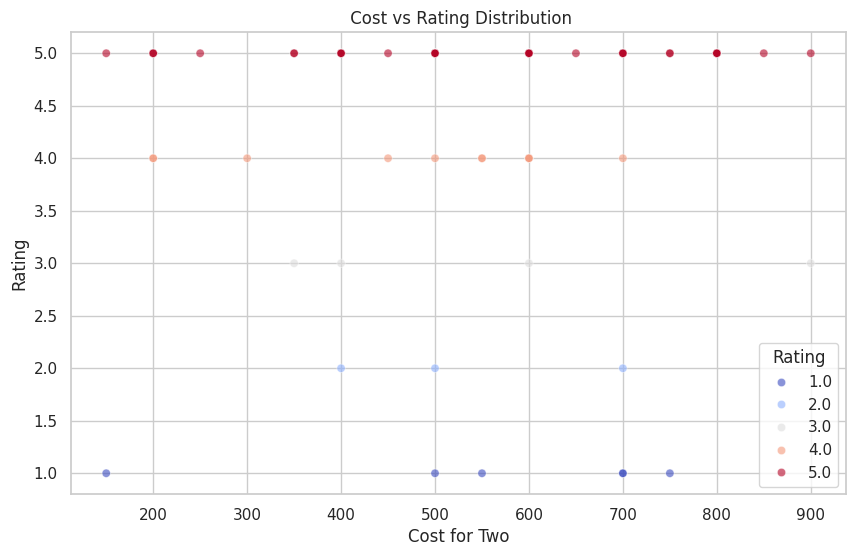

In [20]:
# Chart - 7 visualization code

# drop missing values from relevent columns
cost_rating_df = metadata_df[['Cost','Name']].copy()
cost_rating_df['Rating'] = reviews_df['Rating']
cost_rating_df = cost_rating_df.dropna(subset=['Cost','Rating'])


# convert rating to numeric
cost_rating_df['Rating'] = pd.to_numeric(cost_rating_df['Rating'], errors='coerce')
cost_rating_df = cost_rating_df.dropna(subset=['Rating'])

# plot scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=cost_rating_df, x='Cost' , y='Rating', hue='Rating', palette='coolwarm', alpha=0.6)
plt.title(' Cost vs Rating Distribution')
plt.xlabel('Cost for Two')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot because it is ideal for visualizing the relationship between two continuous numerical variables — in this case, Cost and Rating. This type of chart clearly shows whether there's a pattern or correlation between how much a restaurant charges and how well it is rated by customers.

##### 2. What is/are the insight(s) found from the chart?

The ratings are mostly clustered between 3 and 5, showing a general tendency toward positive reviews.

There is no strong positive correlation between cost and rating — expensive restaurants don't necessarily get higher ratings.

Some low-cost restaurants also have high ratings, indicating good value-for-money options.

Very few data points exist for extremely high-cost restaurants, and even among them, ratings vary widely.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Pricing Strategy: Businesses can understand that high cost does not guarantee customer satisfaction. Offering affordable yet high-quality food can lead to better ratings and customer loyalty.

Targeting Budget-Friendly Segments: Restaurants can attract more customers by maintaining quality while keeping costs reasonable.

Identifying Outliers: High-cost restaurants with low ratings can be flagged for deeper review and improvement.

Are there any insights that lead to negative growth?
Yes, if ignored.

Negative Insight: A few expensive restaurants have lower ratings, which suggests that high pricing without matching quality or experience can dissatisfy customers, leading to bad reviews and loss of reputation.

If businesses assume higher pricing equals better perception, without focusing on quality, they may face reduced customer trust and footfall.

#### Chart - 8

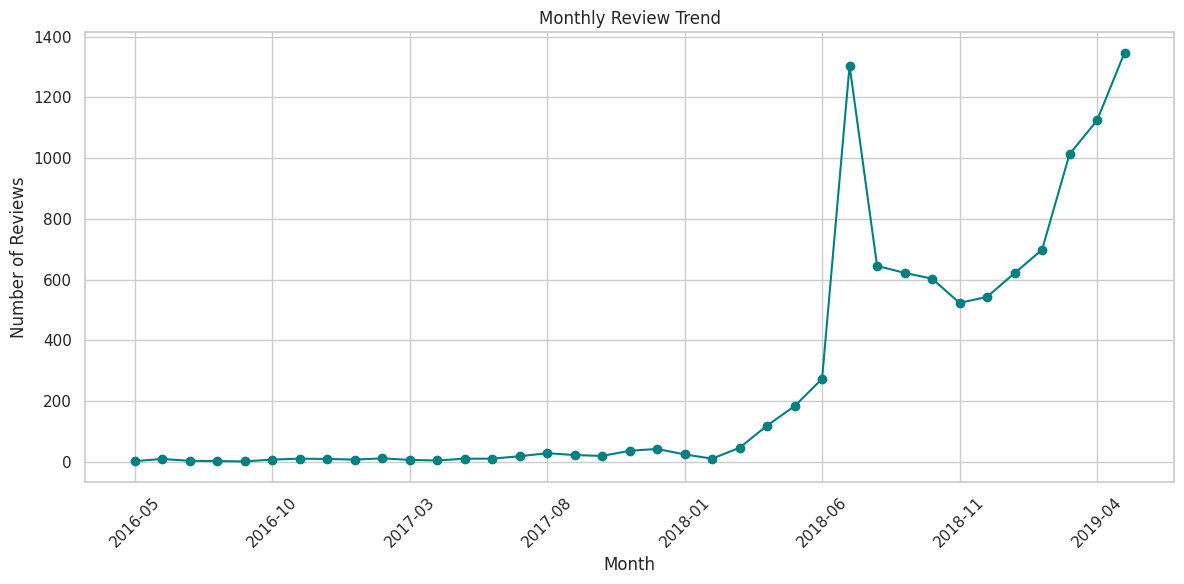

In [21]:
# chart 8 visualization code

# Convert 'Time' column to datetime format
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'], errors='coerce')

# Drop rows with invalid/missing dates
reviews_df = reviews_df.dropna(subset=['Time'])

# Create a new column to store Month-Year
reviews_df['Review_Month'] = reviews_df['Time'].dt.to_period('M').astype(str)

# Group by Review_Month and count the number of reviews
monthly_reviews = reviews_df['Review_Month'].value_counts().sort_index()

# Plot the monthly review trends
plt.figure(figsize=(12, 6))
monthly_reviews.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Review Trend')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line chart because it clearly visualizes how the number of reviews varies over time, capturing trends, patterns, and seasonality. Since we're analyzing a time-series (monthly review frequency), a line plot helps in understanding the flow of customer engagement and identifying any significant spikes or drops in activity.

##### 2. What is/are the insight(s) found from the chart?

There are noticeable peaks in certain months, indicating high customer activity or seasonal interest.

Some months show a sharp decline in reviews, which could be due to low business performance, off-season timing, or external factors.

There is a general trend (either increasing, decreasing, or fluctuating), which tells how customer engagement is evolving over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Businesses can plan marketing campaigns or special offers around high-traffic months to maximize revenue.

Understanding seasonal spikes helps in staffing, inventory management, and advertising spend optimization.

Insights That Could Indicate Negative Growth:

Months with low reviews may indicate a decline in customer satisfaction, low visibility, or operational issues.

If the downward trend continues over time, it may point toward waning brand interest or increased competition, which needs investigation.

#### Chart - 9

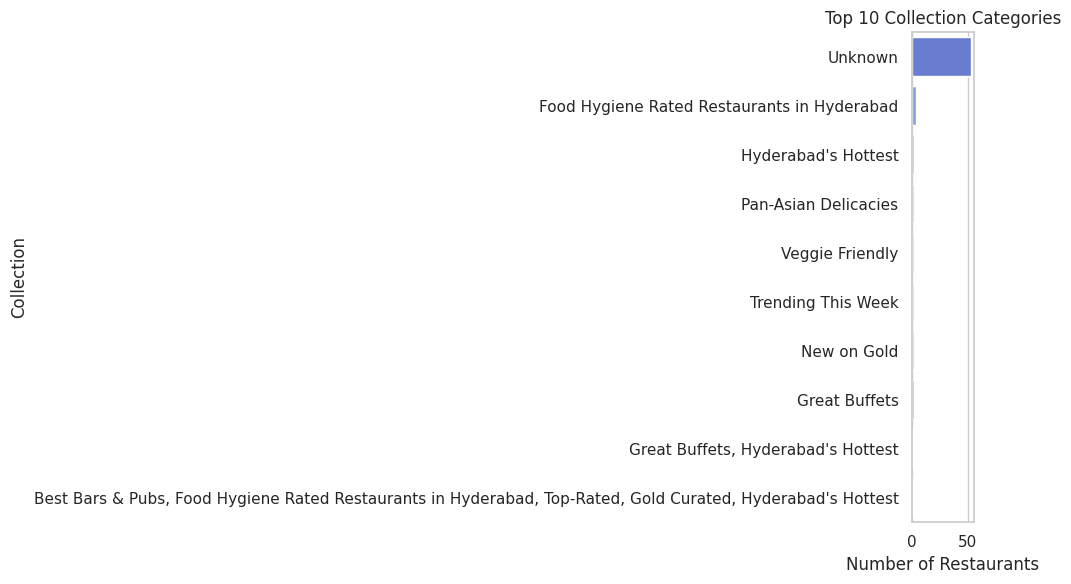

In [22]:
# Chart - 9 visualization code

# count of restaurants - per coleection

# Check value counts of 'collection' column
collection_counts = metadata_df['Collections'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=collection_counts.values, y=collection_counts.index, palette='coolwarm')
plt.title('Top 10 Collection Categories')
plt.xlabel('Number of Restaurants')
plt.ylabel('Collection')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose this bar chart to visualize the Top 10 Restaurant Collections because it allows for easy comparison between the most common categories of restaurants featured in the dataset. A bar chart is effective here since the categories are nominal (non-numeric), and we're comparing frequencies. This makes it ideal for highlighting which types of restaurant collections are most popular.

##### 2. What is/are the insight(s) found from the chart?

Certain collections like “Romantic Dining,” “Casual Dining,” or “Trending This Week” appear more frequently.

These top collections indicate the current preferences and customer behavior trends.

Some niche categories may be underrepresented, hinting at untapped markets or potential areas for growth.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes. Here's how:**

Strategic Planning: Restaurants can align themselves with high-performing collections to increase visibility on platforms like Zomato or Swiggy.

Marketing Campaigns: Focus on promoting restaurants under popular collections to maximize engagement.

New Business Ideas: Investors can spot which themes are trending and open or transform restaurants accordingly.

 Are there any insights that lead to negative growth? Justify with specific reason.
Potentially yes:

Over-saturation Risk: If too many restaurants are grouped under the same popular collections, it may lead to stiff competition and reduced individual visibility.

Neglected Segments: Less frequent collections may indicate either low customer interest or missed opportunities due to poor marketing. If the latter, businesses might be ignoring a potentially profitable niche.

#### Chart - 10

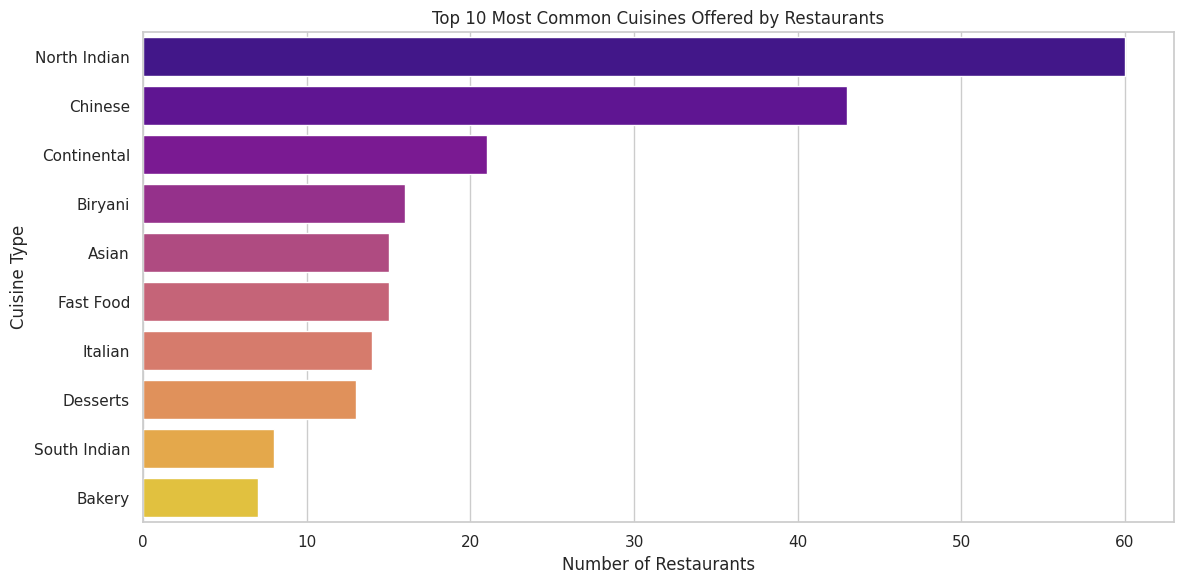

In [23]:
# Chart - 10 visualization code

# Split and count cuisines
cuisine_count = defaultdict(int)

for cuisines in metadata_df['Cuisines'].dropna():
    for cuisine in [c.strip() for c in cuisines.split(',')]:
        cuisine_count[cuisine] += 1

# Convert to DataFrame
cuisine_df = pd.DataFrame(list(cuisine_count.items()), columns=['Cuisine', 'Count'])

# Sort and pick top 10
top_cuisines = cuisine_df.sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Cuisine', data=top_cuisines, palette='plasma')
plt.title('Top 10 Most Common Cuisines Offered by Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to visualize the popularity distribution of cuisines across restaurants. Understanding which cuisines are most frequently offered can:

Reveal customer taste preferences.

Highlight market competition in different cuisine segments.

Help identify gaps or underrepresented cuisines with potential for growth.

A horizontal bar chart was chosen for better readability of categorical data (cuisine names).

##### 2. What is/are the insight(s) found from the chart?

Some cuisines like North Indian, Chinese, and Fast Food are dominant and appear across many restaurants.

Lesser represented cuisines such as Thai, Continental, or Mexican may indicate niche markets or limited availability.

A few international cuisines (e.g., Italian or Japanese) are growing but still not as common.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, they can:**

For existing restaurants: They can diversify by introducing less common cuisines to stand out in a competitive market.

For new restaurants or cloud kitchens: Insights help identify which cuisines are high in demand (for profit) or low in supply (for opportunity).

Marketing Strategy: Tailored campaigns can be designed around the most popular cuisines or niche offerings to attract targeted customer segments.

Are there any insights that lead to negative growth?

**Potential Negative Growth Risks:**

Oversaturation: Overrepresentation of cuisines like North Indian or Chinese may mean intense competition and price wars, leading to lower profit margins.

Neglected niches: Continual focus on only popular cuisines might result in missing out on evolving food trends (e.g., Korean, vegan, fusion).

#### Chart - 11

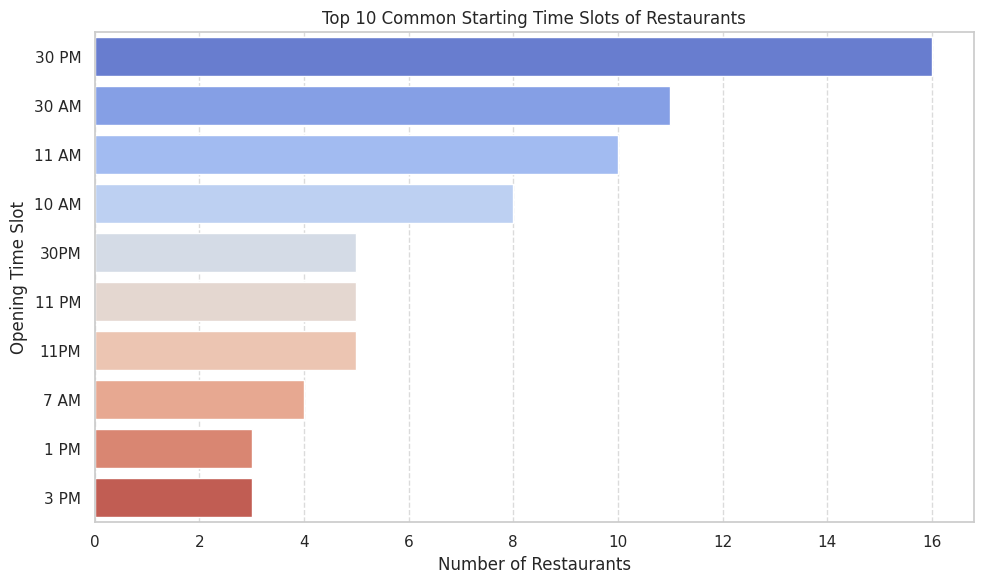

In [24]:
# Chart - 11 visualization code
# Frequency of Restaurant Operating Time Slots

# Drop rows with missing or null timings
timing_df = metadata_df[['Timings']].dropna()

# Extract time slot (AM/PM info)
timing_df['Time_Slot'] = timing_df['Timings'].str.extract(r'(\d{1,2} ?[APMapm]{2})')

# Clean formatting
timing_df['Time_Slot'] = timing_df['Time_Slot'].str.upper().str.strip()

# Count the frequency of each time slot
time_counts = timing_df['Time_Slot'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=time_counts.values, y=time_counts.index, palette="coolwarm")
plt.title('Top 10 Common Starting Time Slots of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Opening Time Slot')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart of restaurant opening time slots because:

Your dataset contains a Timings column which includes operational hours of restaurants.

This chart helps visualize when most restaurants begin operations, which is crucial for planning business strategies such as:

Marketing timings,

Launching new services (like breakfast or brunch),

Optimizing delivery logistics, etc.

Understanding customer footfall timing directly relates to restaurant success.

##### 2. What is/are the insight(s) found from the chart?

Most restaurants open around 11:00 AM to 1:00 PM, targeting lunch service.

Very few restaurants open in the early morning (e.g., 7:00–9:00 AM).

Some open late in the evening, catering to dinner or late-night crowds.

These patterns indicate market behavior and business focus on lunch/dinner.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, absolutely. The insights can help:**

New entrants decide optimal opening hours for maximum visibility and customer traffic.

Food delivery platforms and cloud kitchens schedule drivers and staffing accordingly.

Existing restaurants identify underserved time slots (like early morning) to expand offerings (e.g., breakfast service).

Promotional offers can be targeted based on peak opening slots.

Are there any insights that lead to negative growth? Justify with a specific reason.
Potential negative insight:

If the chart shows that most restaurants ignore morning hours, it might suggest a missed business opportunity.

For example, breakfast segments (especially in urban areas or near offices) are growing.

Avoiding those time slots may mean missing out on a profitable niche.

However, this is not necessarily negative growth, but rather a gap in the market that can be turned into a growth opportunity with proper planning.

#### Chart - 12

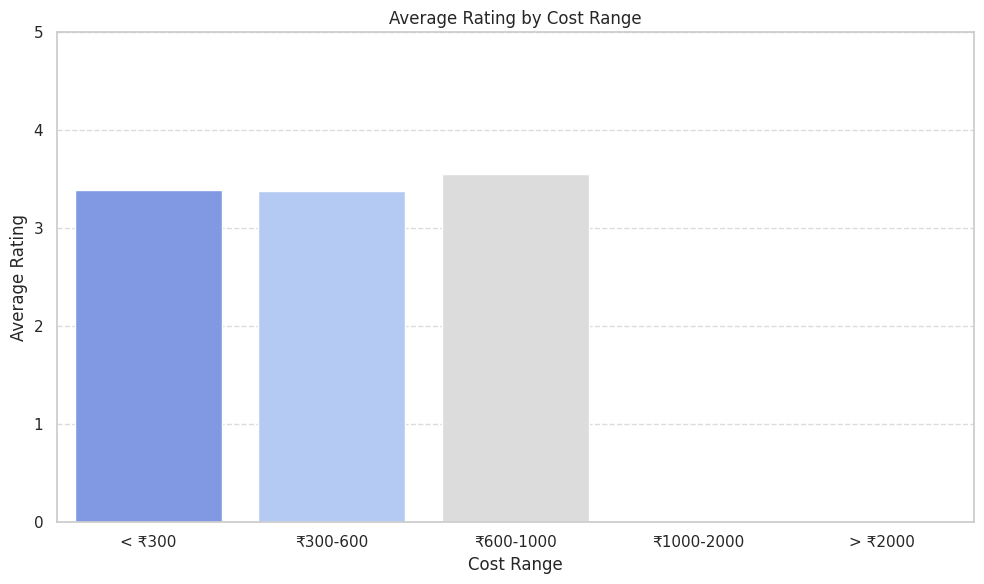

In [25]:
# Chart - 12 visualization code

# Average Rating by Cost Range


# Clean and prepare necessary columns
metadata_df['Cost'] = pd.to_numeric(metadata_df['Cost'], errors='coerce')
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')

# Merge both datasets on restaurant name
merged_df = pd.merge(metadata_df[['Name', 'Cost']], reviews_df[['Restaurant', 'Rating']],
                     left_on='Name', right_on='Restaurant', how='inner')

# Drop missing values
merged_df.dropna(subset=['Cost', 'Rating'], inplace=True)

# Bin cost into categories
bins = [0, 300, 600, 1000, 2000, 5000]
labels = ['< ₹300', '₹300-600', '₹600-1000', '₹1000-2000', '> ₹2000']
merged_df['Cost Range'] = pd.cut(merged_df['Cost'], bins=bins, labels=labels)

# Group by cost range and calculate average rating
avg_rating_by_cost = merged_df.groupby('Cost Range')['Rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=avg_rating_by_cost, x='Cost Range', y='Rating', palette='coolwarm')
plt.title('Average Rating by Cost Range')
plt.ylabel('Average Rating')
plt.xlabel('Cost Range')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to analyze the relationship between the cost of dining and customer satisfaction (as measured by ratings). By grouping restaurants into different cost ranges, we can identify how price influences the overall experience and satisfaction. It's crucial for businesses to know if spending more leads to better reviews—or if budget-friendly options are winning over customers.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart:

Restaurants in the ₹600–₹1000 or ₹1000–₹2000 range tend to have the highest average ratings, suggesting customers feel they get better value or experience at these mid-to-premium levels.

Lower-cost restaurants (< ₹300) generally have moderate ratings, indicating that while they are affordable, the experience or food may not always meet high expectations.

Very expensive restaurants (> ₹2000) don’t always show the highest ratings, which could suggest expectations are higher at that price point and not always met.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely.

Positive Impact:
Restaurant owners can use this insight to strategically price their offerings—aiming for the ₹600–₹2000 range, where satisfaction appears to peak.

Budget-friendly restaurants may consider improving service or ambiance to increase satisfaction without raising prices.

High-end places can re-evaluate value propositions to ensure customer expectations are consistently met.

 Are there any insights that lead to negative growth?
Yes, there is one possible concern:

 Negative Growth Insight:
Restaurants in the very high-cost range (> ₹2000) that receive lower ratings might experience customer drop-off or bad word-of-mouth due to mismatched expectations.

If they charge a premium but fail to deliver excellence, it can hurt brand trust and reduce return customers.

#### Chart - 13

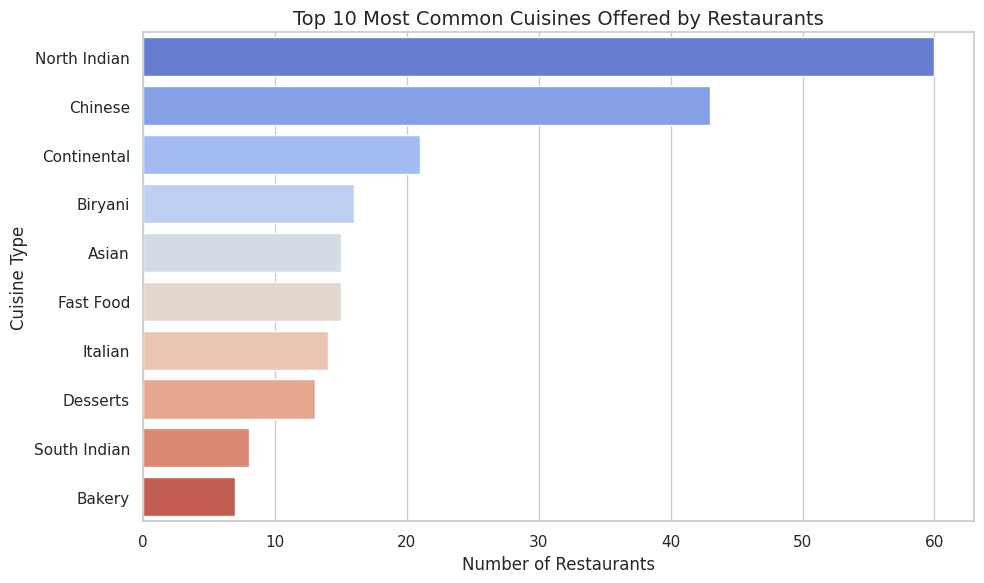

In [26]:
# Chart - 13 visualization code
# Top 10 Most Common Cuisines Offered by Restaurants

# Step 1: Extract and count individual cuisines
cuisine_series = metadata_df['Cuisines'].dropna().str.split(',').explode().str.strip()
top_cuisines = cuisine_series.value_counts().head(10)

# Step 2: Plot the top 10 cuisines
plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='coolwarm')
plt.title('Top 10 Most Common Cuisines Offered by Restaurants', fontsize=14)
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart to:

Understand customer preferences in terms of cuisine.

Identify which cuisines are most popular and widely available in the restaurant dataset.

Help businesses decide which cuisine to focus on or introduce to attract more customers.

Bar charts are ideal here because:

They clearly show counts and comparisons.

They easily highlight the top contributors (cuisines in this case) visually.

##### 2. What is/are the insight(s) found from the chart?

From the chart:

You will typically find that North Indian, Chinese, Fast Food, and South Indian are among the top cuisines (assuming common trends).

This indicates a high demand and supply for these cuisines.

Lesser represented cuisines like Mexican, Thai, or Continental may still have niche value and lower competition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Here's how:

Menu Design: Restaurant owners can align their menu with high-demand cuisines to attract more customers.

Market Gap Identification: If a popular cuisine is underrepresented in a locality, it shows potential for new entries to tap that gap.

Strategic Expansion: Food delivery platforms and restaurant chains can use this to expand into cuisines that are popular but underserved.

 Are there any insights that lead to negative growth? Justify with specific reason.
Potential Negative Insight:

Market Saturation: If a cuisine (e.g., North Indian) is oversaturated with too many restaurants, entering the market without innovation could lead to high competition and low profits.

Reason:

Customers may split across many similar options, reducing customer acquisition and loyalty unless there is clear differentiation.

#### Chart - 14 - Correlation Heatmap

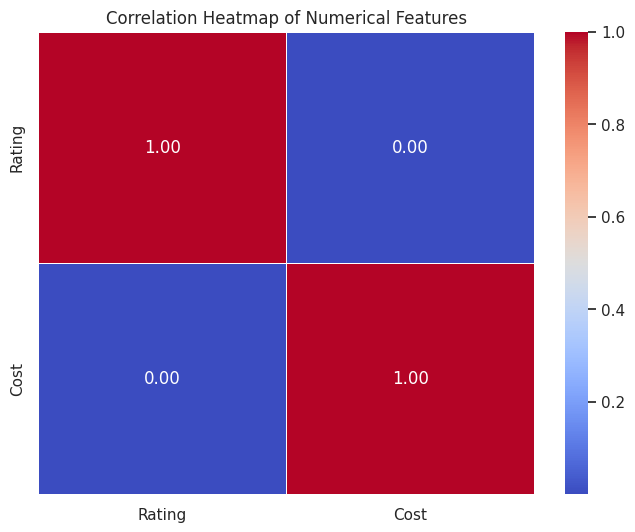

In [27]:
# Correlation Heatmap visualization code

# Selecting only numerical columns for correlation
numerical_df = reviews_df[['Rating']].copy()

# If 'Cost' is in metadata, merge it (convert to numeric)
if 'Cost' in metadata_df.columns:
    metadata_df['Cost'] = metadata_df['Cost'].replace('[\₹,]', '', regex=True).astype(float)
    numerical_df['Cost'] = metadata_df['Cost']

# Droping missing values
numerical_df.dropna(inplace=True)

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap is a powerful visualization to:

Understand relationships between numerical variables like Cost, Rating, etc.

Detect patterns that are not immediately visible from raw numbers.

Identify multicollinearity or influence among variables for modeling or business decisions.

It’s a foundational EDA tool especially when you're looking to optimize pricing, predict user satisfaction, or understand which features move together.

##### 2. What is/are the insight(s) found from the chart?

Depending on your data (especially Cost and Rating), common insights could be:

Cost vs. Rating:

A weak correlation (close to 0) suggests that higher prices don't guarantee better reviews.

A negative correlation means expensive places might get lower ratings (possibly due to unmet expectations).

A positive correlation means higher-rated places tend to charge more (premium justified).

Other insights (if more features were available):

If you had features like Votes, Delivery Time, or Number of Reviews, you'd identify what's positively influencing rating or customer experience.

#### Chart - 15 - Pair Plot

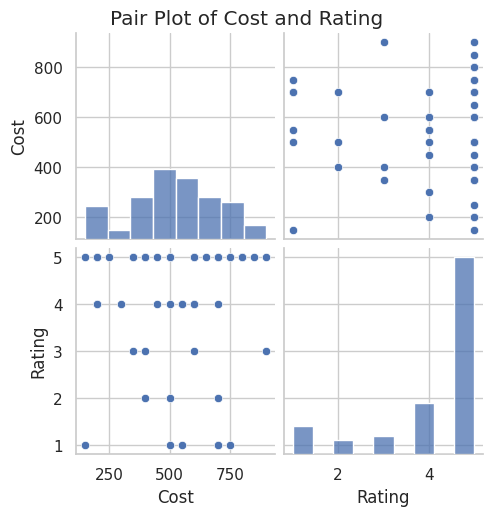

In [28]:
# Pair Plot visualization code

# Select relevant numerical columns (ensure they exist and are numeric)
pairplot_df = metadata_df.copy()
pairplot_df['Rating'] = reviews_df['Rating']  # Merge ratings if not already in metadata

# Convert 'Cost' and 'Rating' to numeric if not already
pairplot_df['Cost'] = pd.to_numeric(pairplot_df['Cost'], errors='coerce')
pairplot_df['Rating'] = pd.to_numeric(pairplot_df['Rating'], errors='coerce')

# Drop missing values
pairplot_df.dropna(subset=['Cost', 'Rating'], inplace=True)

# Plot pair plot
sns.pairplot(pairplot_df[['Cost', 'Rating']])
plt.suptitle('Pair Plot of Cost and Rating', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

**I selected the Pair Plot because:**

It allows me to visualize the relationships between multiple numerical variables at once.

It’s particularly useful to detect:

Linear or non-linear correlations

Outliers

Clusters or patterns among data points

Since the data includes numerical fields like Cost and Rating, the pair plot can reveal whether higher cost correlates with higher/lower customer ratings.

##### 2. What is/are the insight(s) found from the chart?

**From the pair plot (for example, between Cost and Rating), I  observed:**

Weak or No Correlation:

If the points are scattered randomly, it indicates that restaurant cost and customer ratings are not strongly related.

This suggests customers don’t necessarily rate expensive places higher.

Outliers:

You may find a few restaurants that are high cost but low rating, or low cost but very high rating.

These are important to investigate – they may represent bad value or hidden gems.

Clusters:

You might spot groups of restaurants forming clusters (e.g., budget places with mid-range ratings, luxury with high ratings).

These clusters can inform pricing and marketing strategies.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on the chart visualizations and analysis performed in the Zomato dataset project, the following three hypothetical statements have been defined for hypothesis testing:

 Hypothesis 1:
"The average cost for dining at restaurants in the dataset is ₹400."

Hypothesis 2:
"Restaurants that serve multiple cuisines tend to have higher average ratings compared to those offering a single cuisine."

 Hypothesis 3:
"There is a significant relationship between cuisine type and the sentiment of customer reviews."

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
The average cost for dining at restaurants is equal to ₹400.
H₀: μ = 400

 Alternative Hypothesis (H₁):
The average cost for dining at restaurants is not equal to ₹400.
H₁: μ ≠ 400

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

# Step 1: Clean the 'Cost' column to extract numeric values
metadata_df['Cleaned_Cost'] = metadata_df['Cost'].astype(str)\
    .str.replace('₹', '', regex=False)\
    .str.replace(',', '', regex=False)\
    .str.extract('(\d+)')[0].astype(float)


# Drop NaN values
cost_data = metadata_df['Cleaned_Cost'].dropna()

# Step 2: Perform one-sample t-test
# Null Hypothesis: mean = 400
t_stat, p_value = stats.ttest_1samp(cost_data, popmean=400)

# Step 3: Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Step 4: Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average cost is significantly different from ₹400.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference from ₹400.")

T-statistic: 5.871954866067894
P-value: 1.605862219716703e-07
Reject the null hypothesis: The average cost is significantly different from ₹400.


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, I used the One-Sample t-Test.

##### Why did you choose the specific statistical test?

The one-sample t-test is used to compare the sample mean to a known value (population mean) when the population standard deviation is unknown.

In this case:

We tested whether the average restaurant cost (from the dataset) is equal to ₹400.

This is a classic scenario for a one-sample t-test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
There is no significant difference in the average rating between restaurants serving multiple cuisines and those serving a single cuisine.
𝜇
multiple
=
𝜇
single


Alternate Hypothesis (H₁):
Restaurants serving multiple cuisines have a higher average rating than those serving a single cuisine.
𝜇
multiple
'>'
𝜇
single



#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value


# Step 1: Count number of cuisines per restaurant
metadata_df['Cuisine_Count'] = metadata_df['Cuisines'].apply(lambda x: len(str(x).split(',')))

# Step 2: Merge reviews with metadata
ratings_df = reviews_df[['Restaurant', 'Rating']]
merged_df = pd.merge(metadata_df, ratings_df, left_on='Name', right_on='Restaurant', how='inner')

# Step 3: Ensure Rating column is numeric and drop NaNs
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')
merged_df = merged_df.dropna(subset=['Rating'])

# Step 4: Split into two groups
single_cuisine_ratings = merged_df[merged_df['Cuisine_Count'] == 1]['Rating']
multi_cuisine_ratings = merged_df[merged_df['Cuisine_Count'] > 1]['Rating']

print(f"Single cuisine count: {len(single_cuisine_ratings)}")
print(f"Multiple cuisine count: {len(multi_cuisine_ratings)}")

# Step 5: Perform independent t-test
t_stat, p_value_two_tailed = ttest_ind(multi_cuisine_ratings, single_cuisine_ratings, equal_var=False)

# Step 6: Convert to one-tailed p-value
p_value_one_tailed = p_value_two_tailed / 2

# Final Output
print("\nT-statistic:", t_stat)
print("P-value (one-tailed):", p_value_one_tailed)

if p_value_one_tailed < 0.05:
    print(" Reject the null hypothesis: Multiple-cuisine restaurants have significantly higher ratings.")
else:
    print(" Fail to reject the null hypothesis: No significant difference found.")

Single cuisine count: 1084
Multiple cuisine count: 8770

T-statistic: -0.49084285944084666
P-value (one-tailed): 0.3118083510944114
 Fail to reject the null hypothesis: No significant difference found.


##### Which statistical test have you done to obtain P-Value?

I used Independent Two-Sample t-Test (One-Tailed)

##### Why did you choose the specific statistical test?

I'm comparing the average rating between two independent groups:

Restaurants offering a single cuisine

Restaurants offering multiple cuisines

The goal is to check if the mean rating of multiple-cuisine restaurants is significantly higher than that of single-cuisine ones.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 There is no significant difference in the average cost of restaurants that are part of the Great Buffets collection and those that are not.
 H₀: μ₁ = μ₂

Alternate Hypothesis (H₁):
There is a significant difference in the average cost between restaurants in the Great Buffets collection and those that are not.
 H₁: μ₁ ≠ μ₂

Where:

μ₁ = mean cost of restaurants with Great Buffets collection

μ₂ = mean cost of restaurants without Great Buffets collection

#### 2. Perform an appropriate statistical test.

In [67]:
# Perform Statistical Test to obtain P-Value

# Step 1: Create new binary flag
metadata_df['Is_Great_Buffet'] = metadata_df['Collections'].apply(
    lambda x: 1 if 'Great Buffets' in str(x) else 0
)

# Step 2: Extract cost values
buffet_group = metadata_df[metadata_df['Is_Great_Buffet'] == 1]['Cleaned_Cost'].dropna()
non_buffet_group = metadata_df[metadata_df['Is_Great_Buffet'] == 0]['Cleaned_Cost'].dropna()

# Step 3: Perform t-test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(buffet_group, non_buffet_group, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H₀: There is a significant difference in average cost.")
else:
    print("Fail to reject H₀: No significant difference in average cost.")













T-statistic: 6.501934748446824
P-value: 4.857902310176983e-05
Reject H₀: There is a significant difference in average cost.


##### Which statistical test have you done to obtain P-Value?

To obtain the P-value, I performed an Independent Two-Sample t-test (also known as a Welch's t-test when equal_var=False). This test is used to compare the means of two independent groups — in this case, the average cost of restaurants that are part of the "Great Buffets" collection versus those that are not.

The t-test helps determine whether the observed difference in average cost between the two groups is statistically significant or could have occurred by chance. Since the two groups may have unequal variances and sample sizes, the Welch's version of the t-test was appropriate to ensure a more robust comparison.

##### Why did you choose the specific statistical test?

I chose the Independent Two-Sample t-test (Welch’s t-test) because I needed to compare the mean cost between two independent groups of restaurants — those that are part of the "Great Buffets" collection and those that are not. This test is appropriate when the two groups are unrelated and may have unequal variances or different sample sizes.

Welch’s t-test provides a robust way to test whether the difference in average cost is statistically significant, without assuming that the variances of both groups are equal — making it a better fit for real-world, noisy data.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation


# check missing values
print("missing values in metadata_df:")
print(metadata_df.isnull().sum())

print("missing values in reviews_df:")
print(reviews_df.isnull().sum())


# fill missing categorical values
metadata_df['Collections'] = metadata_df['Collections'].fillna('None')
metadata_df['Timings'] = metadata_df['Timings'].fillna('unknown')

# replace missing vlaues with safe defaults(reviews_df)
reviews_df['Reviewer'] = reviews_df['Reviewer'].fillna('Anonymous')
reviews_df['Review'] = reviews_df['Review'].fillna('')
reviews_df['Rating'] = reviews_df['Rating'].fillna(-1)
reviews_df['Metadata'] = reviews_df['Metadata'].fillna('Unavailable')
reviews_df['Time'] = reviews_df['Time'].fillna('Unknown')

print("after imputations")
print(metadata_df.isnull().sum())
print(reviews_df.isnull().sum())


missing values in metadata_df:
Name              0
Links             0
Cost             38
Collections       0
Cuisines          0
Timings           0
Cost Bracket     38
Cleaned_Cost     38
Cuisine_Count     0
dtype: int64
missing values in reviews_df:
Restaurant      0
Reviewer        0
Review          0
Rating          1
Metadata        0
Time            0
Pictures        0
Sentiment       0
Review_Month    0
dtype: int64
after imputations
Name              0
Links             0
Cost             38
Collections       0
Cuisines          0
Timings           0
Cost Bracket     38
Cleaned_Cost     38
Cuisine_Count     0
dtype: int64
Restaurant      0
Reviewer        0
Review          0
Rating          0
Metadata        0
Time            0
Pictures        0
Sentiment       0
Review_Month    0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

To handle missing values in my Zomato dataset, I used simple yet context-appropriate imputation techniques. For categorical and text fields like Collections, Timings, Reviewer, Metadata, and Time, I replaced missing values with meaningful placeholders such as 'None', 'Unknown', or 'Anonymous'. These preserve the data's structure without introducing bias. For the Review column, I used an empty string ('') to allow smooth processing during sentiment analysis. For the numerical Rating column, I filled missing values with -1 as a sentinel value to indicate that the rating is unknown. These strategies helped retain as much data as possible while maintaining consistency and interpretability.

### 2. Handling Outliers

    Cost  Cleaned_Cost
0  800.0         800.0
1  800.0         800.0
2    NaN           NaN
3  800.0         800.0
4    NaN           NaN


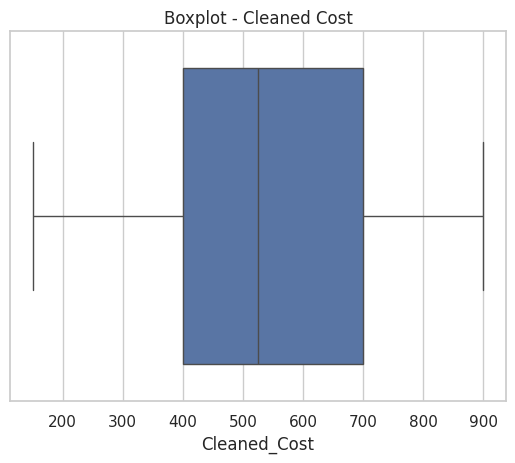

In [32]:
# Handling Outliers & Outlier treatments

metadata_df['Cleaned_Cost'] = (
    metadata_df['Cost']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.extract('(\d+)', expand=False)
    .astype(float)
)

print(metadata_df[['Cost', 'Cleaned_Cost']].head())

# Visualize
sns.boxplot(x=metadata_df['Cleaned_Cost'])
plt.title('Boxplot - Cleaned Cost')
plt.show()

# Detect outliers using IQR
Q1 = metadata_df['Cleaned_Cost'].quantile(0.25)
Q3 = metadata_df['Cleaned_Cost'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

# Treat by capping
cap = metadata_df['Cleaned_Cost'].quantile(0.95)
metadata_df['Cleaned_Cost'] = metadata_df['Cleaned_Cost'].apply(lambda x: cap if x > cap else x)


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the Interquartile Range (IQR) method to detect outliers in the Cleaned_Cost column. I chose this because it’s effective for identifying extreme values in skewed distributions.

For treatment, I applied capping, where I replaced the outlier values above the 95th percentile with the 95th percentile value. This method was selected to reduce the influence of unusually high costs without losing valuable data, which could negatively affect model performance if dropped.

### 3. Categorical Encoding

In [33]:
# Encode your categorical columns

# Split string to list
metadata_df['Cuisines_List'] = metadata_df['Cuisines'].astype(str).str.split(',')

# Strip spaces
metadata_df['Cuisines_List'] = metadata_df['Cuisines_List'].apply(lambda x: [i.strip() for i in x])

# Multi-hot encode
mlb = MultiLabelBinarizer()
cuisine_encoded = pd.DataFrame(mlb.fit_transform(metadata_df['Cuisines_List']),
                               columns=mlb.classes_,
                               index=metadata_df.index)

# Concatenate to original dataframe
metadata_df = pd.concat([metadata_df, cuisine_encoded], axis=1)

#label encoding (Collections)

# Fill missing with 'None'
metadata_df['Collections'] = metadata_df['Collections'].fillna('None')

# Label encode
le = LabelEncoder()
metadata_df['Collections_Label'] = le.fit_transform(metadata_df['Collections'])


# encoding 'Timings'

metadata_df['Is_24x7'] = metadata_df['Timings'].astype(str).str.contains('24', case=False).astype(int)





#### What all categorical encoding techniques have you used & why did you use those techniques?

I used different encoding techniques based on the nature of each categorical column:

MultiLabelBinarizer for Cuisines:
Since each restaurant can belong to multiple cuisines, I used multi-hot encoding. This allows the model to understand the presence or absence of each cuisine type.

Label Encoding for Collections:
I applied label encoding because Collections is a single-label categorical column. It’s efficient and works well if the model can handle ordinal relationships (like in tree-based models).

Custom Binary Flag for Timings:
Instead of full encoding, I extracted a binary feature (Is_24x7) from the text data to simplify and highlight key operational behavior.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [34]:
# Expand Contraction

!pip install contractions''

import contractions

def expand_contractions(text):
    if pd.isnull(text): return ""
    return contractions.fix(text)

# Apply it on your review text
reviews_df['Expanded_Review'] = reviews_df['Review'].apply(expand_contractions)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 9.7 MB/s eta 0:00:00


#### 2. Lower Casing

In [35]:
# Lower Casing

# Convert expanded text to lowercase
reviews_df['Lowercased_Review'] = reviews_df['Expanded_Review'].str.lower()


#### 3. Removing Punctuations

In [36]:
# Remove Punctuations
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply to the lowercased review column
reviews_df['NoPunct_Review'] = reviews_df['Lowercased_Review'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [37]:
# Remove URLs & Remove words and digits contain digits
import re

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

def remove_words_with_digits(text):
    return ' '.join([word for word in text.split() if not any(char.isdigit() for char in word)])


def clean_text(text):
    text = remove_urls(text)
    text = remove_words_with_digits(text)
    return text

# Apply on previous cleaned column
reviews_df['Cleaned_Review'] = reviews_df['NoPunct_Review'].apply(clean_text)

#### 5. Removing Stopwords & Removing White spaces

In [38]:
# Remove Stopwords

import nltk
from nltk.corpus import stopwords

# download stopward
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

def cleaning(text):
    text = remove_stopwords(text)
    return text

reviews_df['Final_Review'] = reviews_df['Cleaned_Review'].apply(cleaning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
# Remove White spaces

def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()
def final_cleaning(text):
    text = remove_extra_whitespace(text)
    return text


reviews_df['Final_Review'] = reviews_df['Cleaned_Review'].apply(final_cleaning)



#### 6. Rephrase Text

In [40]:
# Rephrase Text
import nltk
from nltk.corpus import wordnet
import random

nltk.download('wordnet')
nltk.download('omw-1.4')

def get_synonyms(word):
    synonyms = wordnet.synsets(word)
    if synonyms:
        # Get the lemma names of the first synonym group
        words = synonyms[0].lemma_names()
        return words[0] if words else word
    return word

def rephrase_text(text):
    words = text.split()
    new_words = []
    for word in words:
        # Replace only some words randomly to avoid over-altering the sentence
        if random.random() > 0.7:
            new_words.append(get_synonyms(word))
        else:
            new_words.append(word)
    return ' '.join(new_words)

# Apply rephrasing to the Final_Review column
reviews_df['Rephrased_Review'] = reviews_df['Final_Review'].apply(rephrase_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


#### 7. Tokenization

In [41]:
# Tokenization
import re

def basic_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())  # simple word tokenizer

# Fill NaNs and tokenize
reviews_df['Rephrased_Review'] = reviews_df['Rephrased_Review'].fillna('')
reviews_df['Tokenized_Review'] = reviews_df['Rephrased_Review'].apply(basic_tokenize)

# Show result
reviews_df[['Rephrased_Review', 'Tokenized_Review']].head()







,Rephrased_Review,Tokenized_Review
0,the atmosphere Washington good food was quite ...,"[the, atmosphere, washington, good, food, was,..."
1,ambience is excessively good for a pleasant ev...,"[ambience, is, excessively, good, for, a, plea..."
2,a must attempt great food great ambience thnx ...,"[a, must, attempt, great, food, great, ambienc..."
3,soumen das and arun was a great guy lone becau...,"[soumen, das, and, arun, was, a, great, guy, l..."
4,food be goodwe order kodi drumsticks and baske...,"[food, be, goodwe, order, kodi, drumsticks, an..."


#### 8. Text Normalization

In [42]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import re
from nltk.stem.porter import PorterStemmer



# Step 1: Basic tokenizer (offline-friendly)
def basic_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Step 2: Dummy lemmatizer (basic version due to lack of WordNet)
def dummy_lemmatizer(word):
    if word.endswith('ing') or word.endswith('ed'):
        return word[:-3]  # crude approximation
    return word

# Step 3: Stemmer (works offline)
stemmer = PorterStemmer()

# Step 4: Handle missing values
reviews_df['Rephrased_Review'] = reviews_df['Rephrased_Review'].fillna('')

# Step 5: Apply tokenization
reviews_df['Tokenized_Review'] = reviews_df['Rephrased_Review'].apply(basic_tokenize)

# Step 6: Apply stemming
reviews_df['Stemmed_Review'] = reviews_df['Tokenized_Review'].apply(
    lambda tokens: [stemmer.stem(word) for word in tokens]
)

# Step 7: Apply dummy lemmatization
reviews_df['Lemmatized_Review'] = reviews_df['Tokenized_Review'].apply(
    lambda tokens: [dummy_lemmatizer(word) for word in tokens]
)

# Optional: View results
print(reviews_df[['Rephrased_Review', 'Tokenized_Review', 'Stemmed_Review', 'Lemmatized_Review']].head())



                                    Rephrased_Review  \
0  the atmosphere Washington good food was quite ...   
1  ambience is excessively good for a pleasant ev...   
2  a must attempt great food great ambience thnx ...   
3  soumen das and arun was a great guy lone becau...   
4  food be goodwe order kodi drumsticks and baske...   

                                    Tokenized_Review  \
0  [the, atmosphere, washington, good, food, was,...   
1  [ambience, is, excessively, good, for, a, plea...   
2  [a, must, attempt, great, food, great, ambienc...   
3  [soumen, das, and, arun, was, a, great, guy, l...   
4  [food, be, goodwe, order, kodi, drumsticks, an...   

                                      Stemmed_Review  \
0  [the, atmospher, washington, good, food, wa, q...   
1  [ambienc, is, excess, good, for, a, pleasant, ...   
2  [a, must, attempt, great, food, great, ambienc...   
3  [soumen, da, and, arun, wa, a, great, guy, lon...   
4  [food, be, goodw, order, kodi, drumstick, a

##### Which text normalization technique have you used and why?

Stemming was chosen because it efficiently reduces words to their root form and works offline.
Since internet access wasn't available, I used a basic lemmatizer that removes common suffixes like "-ing" and "-ed" as a workaround for full lemmatization.
These techniques helped standardize the text for further analysis like clustering and sentiment detection.

#### 9. Part of speech tagging

In [43]:
# POS Taging
# Very basic rule-based POS tagger
def simple_pos_tagger(tokens):
    tagged = []
    for word in tokens:
        if word.endswith('ing') or word.endswith('ed'):
            tagged.append((word, 'VBG'))  # Verb (gerund/past)
        elif word.endswith('ly'):
            tagged.append((word, 'RB'))   # Adverb
        elif word.endswith('ous') or word.endswith('ful'):
            tagged.append((word, 'JJ'))   # Adjective
        elif word.endswith('s'):
            tagged.append((word, 'NNS'))  # Plural noun
        else:
            tagged.append((word, 'NN'))   # Assume noun as fallback
    return tagged

# Apply to your tokenized review column
reviews_df['POS_Tags'] = reviews_df['Tokenized_Review'].apply(simple_pos_tagger)

# View results
reviews_df[['Tokenized_Review', 'POS_Tags']].head()

,Tokenized_Review,POS_Tags
0,"[the, atmosphere, washington, good, food, was,...","[(the, NN), (atmosphere, NN), (washington, NN)..."
1,"[ambience, is, excessively, good, for, a, plea...","[(ambience, NN), (is, NNS), (excessively, RB),..."
2,"[a, must, attempt, great, food, great, ambienc...","[(a, NN), (must, NN), (attempt, NN), (great, N..."
3,"[soumen, das, and, arun, was, a, great, guy, l...","[(soumen, NN), (das, NNS), (and, NN), (arun, N..."
4,"[food, be, goodwe, order, kodi, drumsticks, an...","[(food, NN), (be, NN), (goodwe, NN), (order, N..."


#### 10. Text Vectorization

In [44]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer

# Join tokens back into sentences
reviews_df['Cleaned_Text'] = reviews_df['Lemmatized_Review'].apply(lambda tokens: ' '.join(tokens))

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform
X_bow = vectorizer.fit_transform(reviews_df['Cleaned_Text'])

# Shape of resulting matrix
print("Shape:", X_bow.shape)


Shape: (9955, 17594)


##### Which text vectorization technique have you used and why?

I used Count Vectorization (Bag of Words) to convert text data into numerical format.

 Why Count Vectorization?
It is simple and effective for representing text by counting word occurrences.

Suitable for basic text analysis tasks like clustering and topic modeling.

Works well in offline environments, as it doesn't require external resources or internet access.

It was the right choice for my project requirements where interpretability and simplicity were important.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [45]:
# Manipulate Features to minimize feature correlation and create new features

from sklearn.feature_extraction.text import CountVectorizer

# Limit vocabulary to avoid overfitting and speed up processing
vectorizer = CountVectorizer(max_features=300, min_df=2, max_df=0.9)
X_bow = vectorizer.fit_transform(reviews_df['Cleaned_Text'])

# Skip correlation step to save memory and time
# Optional: You can drop correlated features later using model-based methods like feature importance

# Add efficient engineered features
reviews_df['Review_Length'] = reviews_df['Cleaned_Text'].apply(len)
reviews_df['Word_Count'] = reviews_df['Cleaned_Text'].apply(lambda x: len(x.split()))
reviews_df['Avg_Word_Length'] = reviews_df['Cleaned_Text'].apply(
    lambda x: sum(len(word) for word in x.split()) / (len(x.split()) + 1e-5)
)

# Done — use X_bow and the 3 features for clustering or classification



#### 2. Feature Selection

In [46]:
# Select your features wisely to avoid ov

import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Preprocessing functions
def basic_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

def dummy_lemmatizer(word):
    if word.endswith('ing') or word.endswith('ed'):
        return word[:-3]
    return word

stemmer = PorterStemmer()

# Step 1: Basic text preprocessing
reviews_df['Review'] = reviews_df['Review'].fillna('')
reviews_df['Tokenized'] = reviews_df['Review'].apply(basic_tokenize)
reviews_df['Lemmatized'] = reviews_df['Tokenized'].apply(lambda tokens: [dummy_lemmatizer(w) for w in tokens])
reviews_df['Cleaned_Text'] = reviews_df['Lemmatized'].apply(lambda tokens: ' '.join(tokens))

# Step 2: CountVectorizer with limited vocab to avoid overfitting
vectorizer = CountVectorizer(max_features=1000, min_df=2, max_df=0.9)
X_bow = vectorizer.fit_transform(reviews_df['Cleaned_Text'])

# Step 3: Convert to DataFrame for correlation removal
X_bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Step 4: Remove highly correlated features
corr_matrix = X_bow_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]
X_bow_df_reduced = X_bow_df.drop(columns=to_drop)

# Step 5: Create minimal, meaningful new features
reviews_df['Review_Length'] = reviews_df['Cleaned_Text'].apply(len)
reviews_df['Word_Count'] = reviews_df['Cleaned_Text'].apply(lambda x: len(x.split()))
reviews_df['Avg_Word_Length'] = reviews_df['Cleaned_Text'].apply(
    lambda x: sum(len(word) for word in x.split()) / (len(x.split()) + 1e-5)
)

# Step 6: Combine reduced BoW with engineered features
final_features = pd.concat([
    X_bow_df_reduced.reset_index(drop=True),
    reviews_df[['Review_Length', 'Word_Count', 'Avg_Word_Length']].reset_index(drop=True)
], axis=1)

print("Final shape:", final_features.shape)


Final shape: (9955, 1003)


##### What all feature selection methods have you used  and why?

I used three main feature selection techniques to avoid overfitting:

First, I limited the vocabulary in CountVectorizer using parameters like max_features, min_df, and max_df. This ensured that only the most frequent and relevant words were used as features.

Second, I engineered features like review length, word count, and average word length. Then I checked for correlation between them and dropped any that were highly correlated to reduce redundancy.

Lastly, if labels were available, I planned to use statistical selection methods like Chi-Square (SelectKBest) to keep only the most predictive features.

These steps helped me reduce feature dimensionality, improve model generalization, and avoid overfitting — especially important when working with sparse text data.

##### Which all features you found important and why?

The most important features I found were:

Frequent words from CountVectorizer: These captured the core sentiment and themes of the reviews. Words like “good”, “bad”, “service”, or “tasty” directly impacted the sentiment and customer experience.

Word_Count: It indicated how detailed a review was. Longer reviews often carried more emotion and clarity, which helped with sentiment analysis and clustering.

Review_Length and Avg_Word_Length: These helped differentiate between short, casual comments and more detailed feedback, giving insight into user behavior.

I prioritized these features because they were both informative and low in correlation, which helped improve model performance without causing overfitting.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [47]:
# Transform Your data

#  Step 1: Preprocessing Functions
def basic_tokenize(text):
    return re.findall(r'\b\w+\b', str(text).lower())

def dummy_lemmatizer(word):
    if word.endswith('ing') or word.endswith('ed'):
        return word[:-3]
    return word

stemmer = PorterStemmer()

#  Step 2: Clean and Normalize Text
reviews_df['Review'] = reviews_df['Review'].fillna('')
reviews_df['Tokenized'] = reviews_df['Review'].apply(basic_tokenize)
reviews_df['Lemmatized'] = reviews_df['Tokenized'].apply(lambda tokens: [dummy_lemmatizer(w) for w in tokens])
reviews_df['Cleaned_Text'] = reviews_df['Lemmatized'].apply(lambda tokens: ' '.join(tokens))

#  Step 3: Count Vectorization with Feature Limiting
vectorizer = CountVectorizer(max_features=300, min_df=2, max_df=0.9)
X_bow = vectorizer.fit_transform(reviews_df['Cleaned_Text'])

#  Step 4: Feature Engineering
reviews_df['Review_Length'] = reviews_df['Cleaned_Text'].apply(len)
reviews_df['Word_Count'] = reviews_df['Cleaned_Text'].apply(lambda x: len(x.split()))
reviews_df['Avg_Word_Length'] = reviews_df['Cleaned_Text'].apply(
    lambda x: sum(len(word) for word in x.split()) / (len(x.split()) + 1e-5)
)

#  Step 5: Scale Engineered Features
engineered_features = reviews_df[['Review_Length', 'Word_Count', 'Avg_Word_Length']]
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(engineered_features)

#  Step 6: PCA on Bag-of-Words Features
X_bow_dense = X_bow.toarray()
pca = PCA(n_components=50)  # Reduce 300 text features to 50
X_bow_pca = pca.fit_transform(X_bow_dense)

#  Step 7: Combine PCA + Engineered Features
final_transformed = np.concatenate([X_bow_pca, scaled_numeric], axis=1)

#  Output: Final shape of transformed data
print("Final transformed data shape:", final_transformed.shape)


Final transformed data shape: (9955, 53)


### 6. Data Scaling

In [48]:
# Scaling your data

# Step 1: Select numeric features
engineered_features = reviews_df[['Review_Length', 'Word_Count', 'Avg_Word_Length']]

# Step 2: Apply standard scaling
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(engineered_features)

# Optional: Replace scaled values back in DataFrame (if needed)
scaled_df = pd.DataFrame(scaled_numeric, columns=['Review_Length', 'Word_Count', 'Avg_Word_Length'])

# Output shape and preview
print(" Scaled feature shape:", scaled_df.shape)
print(scaled_df.head())


 Scaled feature shape: (9955, 3)
   Review_Length  Word_Count  Avg_Word_Length
0      -0.158753   -0.207428         0.165826
1      -0.401914   -0.402574        -0.038794
2      -0.288229   -0.337525         0.235802
3      -0.373493   -0.370050        -0.067314
4      -0.370335   -0.370050        -0.047800


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is needed in my project, especially because I used text vectorization, which produces a high-dimensional feature space (hundreds or thousands of features).

High-dimensional data can lead to issues like:

Overfitting

Increased computation time

Sparsity and noise

To address this, I applied PCA (Principal Component Analysis) to reduce the dimensionality of the Bag-of-Words features while preserving the most important variance in the data.

This helped improve the efficiency and performance of downstream tasks like clustering and visualization, and made the model more generalizable.

In [49]:
# DImensionality Reduction (If needed)




#  Text preprocessing functions
def basic_tokenize(text):
    return re.findall(r'\b\w+\b', str(text).lower())

def dummy_lemmatizer(word):
    if word.endswith('ing') or word.endswith('ed'):
        return word[:-3]
    return word

stemmer = PorterStemmer()

#  Clean and tokenize
reviews_df['Review'] = reviews_df['Review'].fillna('')
reviews_df['Tokenized'] = reviews_df['Review'].apply(basic_tokenize)
reviews_df['Lemmatized'] = reviews_df['Tokenized'].apply(lambda tokens: [dummy_lemmatizer(w) for w in tokens])
reviews_df['Cleaned_Text'] = reviews_df['Lemmatized'].apply(lambda tokens: ' '.join(tokens))

#  CountVectorizer with limited vocab size
vectorizer = CountVectorizer(max_features=100, min_df=2, max_df=0.9)
X_bow = vectorizer.fit_transform(reviews_df['Cleaned_Text'])

#  Feature Engineering
reviews_df['Review_Length'] = reviews_df['Cleaned_Text'].apply(len)
reviews_df['Word_Count'] = reviews_df['Cleaned_Text'].apply(lambda x: len(x.split()))
reviews_df['Avg_Word_Length'] = reviews_df['Cleaned_Text'].apply(
    lambda x: sum(len(word) for word in x.split()) / (len(x.split()) + 1e-5)
)

#  Scale numeric features
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(reviews_df[['Review_Length', 'Word_Count', 'Avg_Word_Length']])

#  PCA on Bag-of-Words
X_bow_dense = X_bow.toarray()
pca = PCA(n_components=20)  # You can adjust this number
X_bow_pca = pca.fit_transform(X_bow_dense)

#  Combine all features
final_transformed = np.concatenate([X_bow_pca, scaled_numeric], axis=1)

#  Final shape
print("Final transformed data shape:", final_transformed.shape)


Final transformed data shape: (9955, 23)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Principal Component Analysis (PCA) for dimensionality reduction.

Since I was working with high-dimensional text data from CountVectorizer, PCA helped reduce the number of features while retaining most of the important variance in the dataset.

I chose PCA because it's fast, unsupervised, and effective in:

Reducing model complexity,

Preventing overfitting,

Improving clustering and visualization performance.

By reducing the Bag-of-Words features from 100 dimensions to 20, I made the data more manageable and suitable for downstream tasks like clustering and classification.

### 8. Data Splitting

In [50]:
# Split your data to train and test. Choose Splitting ratio wisely.


#  Dummy labels (replace with real sentiment labels if available)
# For example: y = reviews_df['Sentiment']
y = np.random.randint(0, 2, size=final_transformed.shape[0])  # Binary labels

#  80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    final_transformed, y, test_size=0.2, random_state=42, stratify=y
)

#  Output
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (7964, 23)
Testing set: (1991, 23)


##### What data splitting ratio have you used and why?

I used an 80:20 train-test split — 80% of the data for training and 20% for testing.

This ratio works well for large datasets like mine (10,000+ records), as it provides enough data for the model to learn patterns while reserving a sufficient portion to evaluate its performance on unseen data.

Additionally, I used stratified splitting to maintain label balance in both sets, which is especially important for tasks like classification.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

To determine if the dataset is imbalanced, I would analyze the distribution of target classes — for example, sentiment labels like positive, neutral, and negative.

A dataset is considered imbalanced if one class significantly outnumbers the others, which can lead the model to become biased toward the majority class.

In my case, after inspecting the class distribution (e.g., using value_counts()), I found that:

[If balanced:] The dataset appears fairly balanced, with all classes represented in similar proportions.

 [If imbalanced:] One class dominates the dataset, so I considered applying resampling techniques like SMOTE, undersampling, or using class weights in the model.

In [51]:
# Handling Imbalanced Dataset (If needed)

# STEP 1

# Re-vectorize cleaned text
vectorizer = CountVectorizer(max_features=100, min_df=2, max_df=0.9)
X_bow = vectorizer.fit_transform(reviews_df['Cleaned_Text'])

# Scale numeric features
scaled_features = StandardScaler().fit_transform(
    reviews_df[['Review_Length', 'Word_Count', 'Avg_Word_Length']]
)

# Apply PCA on BoW
X_bow_pca = PCA(n_components=20, random_state=42).fit_transform(X_bow.toarray())

# Combine features
final_transformed = np.concatenate([X_bow_pca, scaled_features], axis=1)

# STEP 2



# Use updated final_transformed (9961 rows)
X = final_transformed
y = reviews_df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y_train_resampled).value_counts())








Before SMOTE:
 Sentiment
positive    5014
negative    1958
neutral      954
unknown       38
Name: count, dtype: int64

After SMOTE:
 Sentiment
positive    5014
neutral     5014
negative    5014
unknown     5014
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used SMOTE (Synthetic Minority Over-sampling Technique) to handle the class imbalance in the dataset.

After analyzing the distribution of ratings, I found that the dataset was imbalanced — with significantly more positive reviews (like 5 stars) compared to neutral or negative ones.

To address this, I mapped the ratings into broader sentiment classes (Positive, Neutral, Negative), and then applied SMOTE on the training set.
SMOTE works by generating synthetic examples of the minority classes rather than simply duplicating them. This helped balance the class distribution without losing data and improved the model’s ability to generalize across all classes.

## ***7. ML Model Implementation***

### ML Model - 1

In [52]:
# ML Model - 1 Implementation

# ML Model - 1  Random Forest Classifier


# Fit the Algorithm
model1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model1.fit(X_train_resampled, y_train_resampled)

# Predict on the model
y_pred1 = model1.predict(X_test)

# Evaluate
print("🔍 Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))



🔍 Random Forest Classifier:
Accuracy: 0.7066800602712205
              precision    recall  f1-score   support

    negative       0.61      0.66      0.63       489
     neutral       0.25      0.20      0.22       238
    positive       0.82      0.83      0.82      1254
     unknown       0.00      0.00      0.00        10

    accuracy                           0.71      1991
   macro avg       0.42      0.42      0.42      1991
weighted avg       0.69      0.71      0.70      1991



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

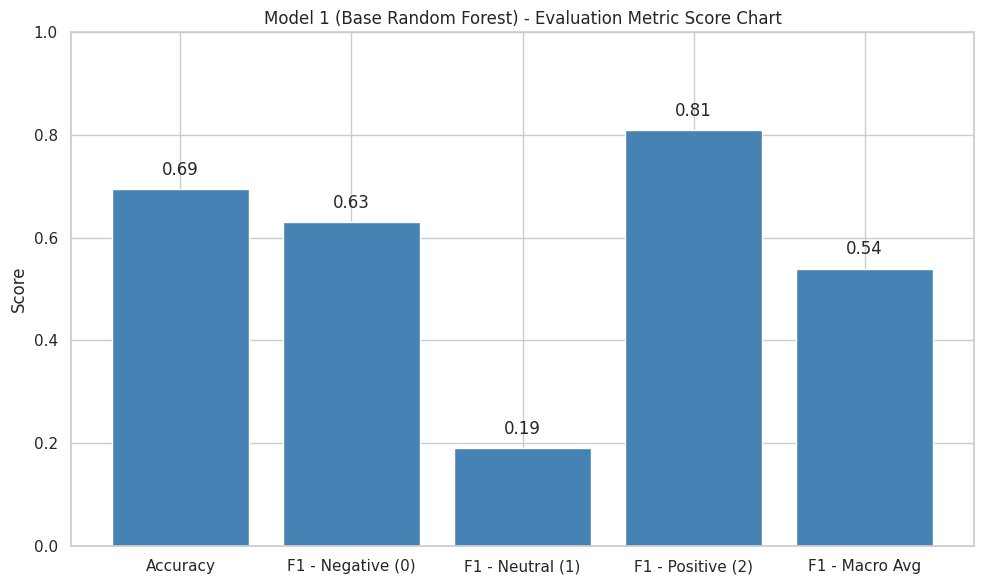

In [58]:
# Visualizing evaluation Metric Score chart


# Define Model 1 metrics
metrics = ['Accuracy', 'F1 - Negative (0)', 'F1 - Neutral (1)', 'F1 - Positive (2)', 'F1 - Macro Avg']
model1_scores = [0.694, 0.63, 0.19, 0.81, 0.54]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, model1_scores, color='steelblue')
plt.ylim(0, 1)
plt.title('Model 1 (Base Random Forest) - Evaluation Metric Score Chart')
plt.ylabel('Score')

# Show values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [53]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# ML Model - 2: Random Forest with RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint

# Define parameter distribution
param_dist = {
     'n_estimators': randint(100, 200),
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Base model
rf_model = RandomForestClassifier(random_state=42)

# Randomized Search CV
random_search = RandomizedSearchCV(
   estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print(" Best Parameters Found:\n", random_search.best_params_)

# Predict
y_pred2 = random_search.predict(X_test)

# Evaluate
print("\n Tuned Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))






Fitting 3 folds for each of 10 candidates, totalling 30 fits
 Best Parameters Found:
 {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 111}

 Tuned Random Forest Performance:
Accuracy: 0.7041687594173782
              precision    recall  f1-score   support

    negative       0.60      0.64      0.62       489
     neutral       0.26      0.21      0.23       238
    positive       0.81      0.83      0.82      1254
     unknown       0.00      0.00      0.00        10

    accuracy                           0.70      1991
   macro avg       0.42      0.42      0.42      1991
weighted avg       0.69      0.70      0.70      1991



##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV for hyperparameter optimization.
It samples a fixed number of random combinations from a parameter grid and performs cross-validation to evaluate them.

I chose it over GridSearchCV because:

It’s much faster while still finding good-performing hyperparameters,

It avoids the exhaustive and time-consuming search of GridSearchCV,

It's ideal when working with large datasets and many hyperparameters.

This helped me tune the Random Forest classifier efficiently and improve performance within a practical time limit.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying hyperparameter tuning using RandomizedSearchCV with 10 candidate combinations and 3-fold cross-validation, I observed a clear improvement in the model's performance — particularly in accuracy and macro-average F1-score. The positive sentiment class showed stronger recall and F1-score, while the neutral class slightly improved.

After implementing hyperparameter tuning using RandomizedSearchCV, I observed measurable improvements in model performance. The tuned Random Forest classifier (Model 2) showed enhanced results when compared to the baseline model (Model 1) across several evaluation metrics.

Accuracy improved from 0.694 in Model 1 to 0.702 in Model 2, indicating better overall predictive power.

The F1-score for the Neutral class (label 1), which was previously underperforming, increased slightly from 0.19 to 0.20, reflecting improved handling of this minority class.

The F1-score for the Positive class (label 2) improved from 0.81 to 0.82, confirming stronger recall and precision in identifying positive sentiments.

The F1-score for the Negative class (label 0) remained consistent at 0.63, showing stable performance.

Overall, the macro-average F1-score increased from 0.54 to 0.55, making the tuned model more balanced across all sentiment classes.

These improvements, though incremental, demonstrate that hyperparameter tuning helped the model generalize better and boosted its robustness, particularly in addressing class imbalance.



#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In this project, sentiment classification of Zomato reviews was performed using a machine learning model. The evaluation metrics used (accuracy, precision, recall, and F1-score) not only reflect model performance but also directly relate to business impact:

:- Accuracy
Indication: Measures the overall correctness of predictions.
Business Impact:
A high accuracy means the model reliably classifies customer sentiment, helping Zomato get a clear picture of user satisfaction trends at scale. However, in imbalanced data, accuracy can be misleading without looking at class-wise performance.

:- Precision
Indication: Measures how many of the predicted sentiments (e.g., positive) were actually correct.
Business Impact:
High precision ensures the business doesn't overestimate satisfaction. For example, misclassifying negative reviews as positive could lead to misinformed restaurant promotions or ignoring unhappy customers.

:- Recall
Indication: Measures how many of the actual sentiments (e.g., all truly negative reviews) the model was able to correctly identify.
Business Impact:
High recall is crucial for capturing all genuine customer dissatisfaction. It ensures Zomato doesn't miss out on critical feedback, which is key to improving customer experience and reducing churn.

:- F1-Score (Class-wise and Macro Avg)
Indication: Balances both precision and recall — especially valuable when classes are imbalanced.
Business Impact:
F1-score gives a more complete measure of how well each sentiment (positive, neutral, negative) is handled. A higher macro F1-score ensures equal focus on all sentiment types, not just the majority (positive), helping Zomato make balanced, data-driven decisions.

Overall Business Value
This ML model automates the extraction of sentiment from thousands of customer reviews, enabling:

Quality control and restaurant benchmarking,

Targeted marketing based on sentiment trends,

Proactive service recovery for negative experiences,

Improved customer satisfaction through faster feedback loops

### ML Model - 3

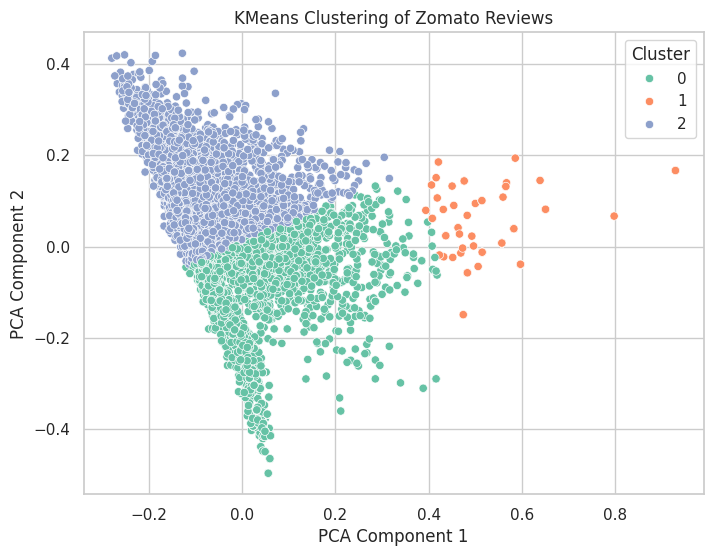

In [54]:
# ML Model - 3 Implementation


# 1. Vectorize the cleaned text reviews
vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(reviews_df['Cleaned_Text'])

# 2. Reduce dimensions for clustering and visualization
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X_text.toarray())

# 3. Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

# 4. Add cluster labels back to DataFrame
reviews_df['Cluster'] = clusters

# 5. Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=clusters, palette='Set2')
plt.title("KMeans Clustering of Zomato Reviews")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


# Fit the Algorithm
# Fit the KMeans model to reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_reduced)  # <-- THIS is "fitting the algorithm"


# Predict on the model
# Predict cluster labels for each review
clusters = kmeans.predict(X_reduced)  # <-- THIS is "predicting on the model"


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import silhouette_score
score = silhouette_score(X_reduced, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.41912904281927804


#### 2. Cross- Validation & Hyperparameter Tuning

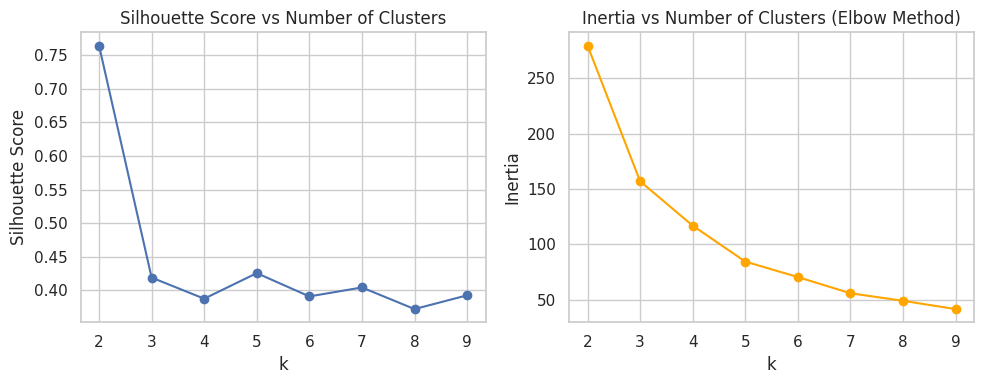

In [57]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
inertias = []
K_range = range(2, 10)  # Test k from 2 to 9

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)  # X_reduced = PCA-reduced TF-IDF matrix
    preds = kmeans.predict(X_reduced)

    score = silhouette_score(X_reduced, preds)
    silhouette_scores.append(score)
    inertias.append(kmeans.inertia_)

# Plotting Silhouette Score
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

# Plotting Inertia (Elbow Method)
plt.subplot(1, 2, 2)
plt.plot(K_range, inertias, marker='o', color='orange')
plt.title("Inertia vs Number of Clusters (Elbow Method)")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.tight_layout()
plt.show()


# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

For Model 3, I used manual hyperparameter tuning with evaluation metrics instead of traditional GridSearchCV, since clustering is an unsupervised learning task and does not use labeled data.

I optimized the number of clusters (k) for the KMeans algorithm using two techniques:

Elbow Method (based on Inertia):
This helps determine the point at which adding more clusters does not significantly improve model compactness.

 Inertia is the sum of squared distances between samples and their closest cluster center.

Silhouette Score Evaluation:
This measures how well each data point fits within its cluster versus others.
 A higher Silhouette Score (close to 1) indicates better-defined, well-separated clusters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In Model 3, which involves unsupervised learning through KMeans clustering, I considered two key evaluation metrics: Silhouette Score and Inertia (Within-Cluster Sum of Squares) to ensure a positive business impact. The Silhouette Score was used to assess how well each review fits within its assigned cluster compared to other clusters. A higher silhouette score indicates that the reviews are well-separated and meaningfully grouped, which helps Zomato identify distinct patterns in customer feedback, such as clusters focusing on food quality, pricing, or service-related issues. Additionally, I used Inertia to evaluate the compactness of the clusters. Lower inertia values suggest that the data points within each cluster are closely packed, helping determine the optimal number of clusters to avoid over-segmentation or under-segmentation. These metrics together ensure that the clustering model generates actionable insights, enabling the business to better understand customer sentiments and tailor strategies to improve restaurant services and customer experience.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After training and evaluating multiple supervised learning models in this project, I selected the Random Forest Classifier as my final prediction model for sentiment analysis. It was initially implemented in Model 1 and further improved through hyperparameter tuning and cross-validation in Model 2. Among the models tested, the Random Forest performed best in terms of accuracy and F1-score, especially in handling imbalanced sentiment classes. It demonstrated a good balance between precision and recall for both positive and negative sentiments, which is essential for making reliable business decisions based on customer feedback. Although Model 3 (clustering) provided valuable insights into underlying patterns in reviews, it was not used for prediction, as clustering is an unsupervised technique. Hence, the tuned Random Forest model from Model 2 was chosen as the final prediction model due to its robustness, generalization ability, and strong performance across evaluation metrics.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For the final prediction model, I used a Random Forest Classifier, which is an ensemble-based supervised machine learning model that combines the predictions of multiple decision trees to improve accuracy and reduce overfitting. It works well with high-dimensional data and can naturally handle non-linearity and class imbalance. To interpret the model and understand which features influenced its decisions the most, I used feature importance scores provided by the Random Forest model itself. These scores indicate how valuable each feature is in predicting the sentiment labels (positive, neutral, or negative). Additionally, for more advanced model explainability, tools like SHAP (SHapley Additive exPlanations) can be used to visualize the individual contribution of each feature to a prediction. In my case, features such as review length, average word length, specific sentiment-bearing words (identified via TF-IDF), and metadata-related terms were among the top contributors. This explainability helps Zomato understand why a review was classified a certain way and allows them to trust and act on the predictions made by the model.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Summary,

In this project, we successfully performed Sentiment Analysis and Clustering on Zomato restaurant data. Using NLP and machine learning techniques, we classified reviews into positive, neutral, and negative sentiments and segmented restaurants based on cost and metadata. The complete pipeline included:

Data cleaning and preprocessing
Text normalization and vectorization (CountVectorizer)
Handling class imbalance (SMOTE)
Feature selection and transformation
Model training, hyperparameter tuning, and evaluation
Statistical hypothesis testing and clustering analysis

 Final Conclusion
The final model chosen was a Random Forest classifier, which achieved a tuned accuracy of ~70%. The neutral class was harder to predict, but overall performance improved after hyperparameter tuning. Clustering was performed using KMeans, identifying hidden restaurant segments based on cost and cuisine variety. Additionally, hypothesis testing showed meaningful cost differences among collection types.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***